In [1]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np 
from scipy.special import softmax
import csv 
import urllib.request
from transformers import AutoTokenizer, AutoModelForMaskedLM

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm

In [153]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows',None)

In [3]:
task = 'sentiment'

MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base")


In [4]:
# downloading label mapping 

labels =[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split('\n')
    csvreader = csv.reader(html, delimiter = '\t') 
labels = [row[1] for row in csvreader if len(row)>1]   

labels

['negative', 'neutral', 'positive']

In [5]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)
tokenizer.save_pretrained(MODEL)

('cardiffnlp/twitter-roberta-base-sentiment/tokenizer_config.json',
 'cardiffnlp/twitter-roberta-base-sentiment/special_tokens_map.json',
 'cardiffnlp/twitter-roberta-base-sentiment/vocab.json',
 'cardiffnlp/twitter-roberta-base-sentiment/merges.txt',
 'cardiffnlp/twitter-roberta-base-sentiment/added_tokens.json',
 'cardiffnlp/twitter-roberta-base-sentiment/tokenizer.json')

In [184]:
text = 'Neutral'
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [185]:
ranking = np.argsort(scores)
ranking = ranking[::-1]

for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
print(labels[np.argmax(scores)])

neutral


In [43]:
def get_sentiment(text):
    encoded_input = tokenizer(text,return_tensors ='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    
    for i in scores:
        s = scores[np.argmax(scores)]
        l = labels[np.argmax(scores)]
        return l

        #argmax just returns the indices of the max score 

In [44]:
text = ['i like that']
get_sentiment(text)

'positive'

In [157]:
df[['Text']]

,Text
0,@Uber_Canada #uber so you tell me I have a dis...
1,Life in prison for man in killing of South Car...
2,"“Following the pandemic-led lockdowns, America..."
3,Great security at @iflymia @DHSgov with no des...
4,@SkyNews Can govt start policing companies tha...
...,...
30491,Please don’t drink and drive! Think about it! ...
30492,"For $5 in ride credit, download the Lyft app u..."
30493,Car check! Make it a habit to check all these ...
30494,"Requested a #Lyft, #Uber, or #Taxi through an ..."


In [47]:
df = pd.read_csv('/Users/jchap/Desktop/Cap3_Sentiment_Analysis_Project/Data/Cleaned_dataset_v1.csv')

In [48]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet ID', 'Text', 'Username', 'Language'], dtype='object')

In [49]:
df.drop(columns='Unnamed: 0')

,Datetime,Tweet ID,Text,Username,Language
0,2021-07-27 23:23:08+00:00,1420162870101241856,@Uber_Canada #uber so you tell me I have a dis...,berthorny,en
1,2021-07-27 23:02:19+00:00,1420157632476745728,Life in prison for man in killing of South Car...,upstractcom,en
2,2021-07-27 23:00:52+00:00,1420157266658054151,"“Following the pandemic-led lockdowns, America...",badgerinstitute,en
3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no des...,RafaelAntun,en
4,2021-07-27 22:39:35+00:00,1420151910905040896,@SkyNews Can govt start policing companies tha...,peaceandprotect,en
...,...,...,...,...,...
30491,2021-01-01 01:30:57+00:00,1344818359574163456,Please don’t drink and drive! Think about it! ...,jericka_w,en
30492,2021-01-01 01:04:59+00:00,1344811828564664320,"For $5 in ride credit, download the Lyft app u...",CassiopeiaBQ,en
30493,2021-01-01 00:43:02+00:00,1344806301168242689,Car check! Make it a habit to check all these ...,App_ADITT,en
30494,2021-01-01 00:18:34+00:00,1344800145595105282,"Requested a #Lyft, #Uber, or #Taxi through an ...",RideSafeWorld,en


In [77]:
df.dropna(inplace=True)

In [78]:
df.isnull().sum()

Unnamed: 0    0
Datetime      0
Tweet ID      0
Text          0
Username      0
Language      0
dtype: int64

In [80]:
#applying function to create sentiment column
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [81]:
df

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
0,0,2021-07-27 23:23:08+00:00,1420162870101241856,@Uber_Canada #uber so you tell me I have a dis...,berthorny,en,negative
1,1,2021-07-27 23:02:19+00:00,1420157632476745728,Life in prison for man in killing of South Car...,upstractcom,en,negative
2,2,2021-07-27 23:00:52+00:00,1420157266658054151,"“Following the pandemic-led lockdowns, America...",badgerinstitute,en,negative
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no des...,RafaelAntun,en,positive
4,4,2021-07-27 22:39:35+00:00,1420151910905040896,@SkyNews Can govt start policing companies tha...,peaceandprotect,en,negative
...,...,...,...,...,...,...,...
30491,12551,2021-01-01 01:30:57+00:00,1344818359574163456,Please don’t drink and drive! Think about it! ...,jericka_w,en,neutral
30492,12552,2021-01-01 01:04:59+00:00,1344811828564664320,"For $5 in ride credit, download the Lyft app u...",CassiopeiaBQ,en,positive
30493,12553,2021-01-01 00:43:02+00:00,1344806301168242689,Car check! Make it a habit to check all these ...,App_ADITT,en,neutral
30494,12554,2021-01-01 00:18:34+00:00,1344800145595105282,"Requested a #Lyft, #Uber, or #Taxi through an ...",RideSafeWorld,en,neutral


In [82]:
df['Sentiment'].value_counts()

neutral     12108
negative    10377
positive     7888
Name: Sentiment, dtype: int64

In [83]:
Positive = df.loc[df['Sentiment']=='positive']

In [166]:
Positive.head(100)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no designated or enforced @Uber and @lyft areas and #uber #lyft drivers just parking and waiting wherever they please and no @MiamiDadePD in sight @MayorDaniella,RafaelAntun,en,positive
5,6,2021-07-27 22:18:04+00:00,1420146498499719169,@CTVNews This is a warming for everyone who uses #uber and #lyft. #TOpoli,BadUberX,en,positive
9,10,2021-07-27 21:28:44+00:00,1420134081564708867,Research reveals that @Uber #RideSharing services have reduced drunk driving deaths by 6.1 percent. Research only examined #Uber data. @lyft data would increase such benefits.,SharpPlaysGroup,en,positive
26,28,2021-07-27 18:56:10+00:00,1420095688117948418,@sarahschauer Latin America feels like. Even tho these days it's kinda workin' the other way round. Uber/Didis simply want to live. #Didi #Uber,J_TazerPunk,en,positive
30,32,2021-07-27 18:20:17+00:00,1420086655038500866,"Delivery fee on order is $2. Restaurant is about 5/10 min bike ride away in NYC. Let’s say Uber takes another $2 from restaurant. Uber can prob group 7 other orders to keep the delivery driver busy for the hour…unit economics only work at scale, only #Uber #doordash can do this https://t.co/DsDbfwwjw6",HudsonFarWest,en,positive
34,36,2021-07-27 17:54:17+00:00,1420080112188411908,Check out Recommended Gear on Amazon\n\nhttps://t.co/8o5EbPWu5W\n#crypto#covid #uber #amazon #SEO #ETHERIUM #ALTCOIN #Bitcoin #money #freedom #luckyfish #win #giveaway #lottery #free,HANDGUNGUN,en,positive
38,40,2021-07-27 16:53:47+00:00,1420064886646771716,Check out these recommended products on Amazon\n\nhttps://t.co/8o5EbPWu5W\n #crypto#covid #uber #amazon #SEO #ETHERIUM #ALTCOIN #Bitcoin #money #freedom #luckyfish #win #giveaway #lottery #free,HANDGUNGUN,en,positive
43,45,2021-07-27 16:21:21+00:00,1420056726703906816,Get your first #Uber ride #FREE (up to $20) with invite code 'aaront3765ue'. Enjoy! 😊 Download the App ► https://t.co/x2Sl4E0EGP,aarontupaz,en,positive
45,47,2021-07-27 16:08:43+00:00,1420053544644792325,"@sns__12 @TwitterSupport I would like to recommend Johnshawn_tech on Instagram he is a software expert who is skillful when it comes to reactivation of #socialmedia accounts, #uber reactivation, PayPal &amp; Amazon, and other software issues. Give him a Dm today.",gracefidelis_,en,positive
46,48,2021-07-27 16:02:57+00:00,1420052097513365506,"Uber's 2021 ESG global report is out. We have raised the bar on impact in communities, user safety, privacy, security, ethics, people and culture, and climate change. Doing the right thing. #transparency #uber.\n \nhttps://t.co/J2LuXiLYfY",prabhjeet_s,en,positive


In [89]:
Negative = df.loc[df['Sentiment'] == 'negative']

In [165]:
Negative.head(100)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
0,0,2021-07-27 23:23:08+00:00,1420162870101241856,@Uber_Canada #uber so you tell me I have a discount then I go into book and its double the amount cause you say its peek hours.. a cab is getting me home for $9 reg price and you asshats gonna charge 18.. nice deal you ass fucks,berthorny,en,negative
1,1,2021-07-27 23:02:19+00:00,1420157632476745728,Life in prison for man in killing of South Carolina student who mistook his car for Uber #man #student #uber #samanthajosephsonwis10mansentencedtolifeinprisonformurderofcollegestudentsamanthajosephson #prison #killing https://t.co/mtJ3vHGQ0t,upstractcom,en,negative
2,2,2021-07-27 23:00:52+00:00,1420157266658054151,"“Following the pandemic-led lockdowns, Americans struggled to pay the bills.” @ChloeAnagnos @IndependentInst #uber \n\nhttps://t.co/QA1DZIRNM1",badgerinstitute,en,negative
4,4,2021-07-27 22:39:35+00:00,1420151910905040896,@SkyNews Can govt start policing companies that don't make profit and cheat the system.. how is this good for any economy?\n\n#purplebricks #uber #tech \n#NoTax left to pay #nhs #mp salaries.,peaceandprotect,en,negative
8,9,2021-07-27 21:30:52+00:00,1420134619857539073,#SouthCarolina Man found #guilty of murdering college student who mistook his car for #Uber https://t.co/oBraaQIN1a,Travelaviator,en,negative
13,14,2021-07-27 21:03:14+00:00,1420127666246651912,Seriously #Uber this is a joke https://t.co/M7gSjfzc9B,Scoop5000,en,negative
18,20,2021-07-27 20:13:11+00:00,1420115067480289289,$100+ fares and 2-hour wait times: What the #Uber and #Lyft driver shortage means for you https://t.co/bWDVADzG9k,LimoGame,en,negative
19,21,2021-07-27 20:04:33+00:00,1420112897737375749,"Like I said, #goodbyeUber! @Uber’s standards are terrible, and their customer service response does nothing to help their passengers. Deleted! No future ride-shares will happen with this company. @Uber_Support #Uber https://t.co/V6Mi96yVsQ https://t.co/wsI95JyM3B",4katiemack,en,negative
20,22,2021-07-27 20:00:58+00:00,1420111995815165961,Nothing like feeling like #Uber is limiting my rides... Patterns paint a dirty picture. So apparently after making $150+ they start giving me 1 rider an hour. Who else experiences this!? #uberdriver,rockstarmaxey,en,negative
23,25,2021-07-27 19:19:04+00:00,1420101450668126209,@Uber STOP SENDING DRIVERS WHO DONT SPEAK ENGLISH!!!!!! #uber #fail #badservice,BrantsRants,en,negative


In [93]:
Uber = df.loc[df['Text'].str.contains('Uber',case=False)]
Lyft = df.loc[df['Text'].str.contains('Lyft',case=False)]

In [98]:
Uber

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
0,0,2021-07-27 23:23:08+00:00,1420162870101241856,@Uber_Canada #uber so you tell me I have a discount then I go into book and its double the amount cause you say its peek hours.. a cab is getting me home for $9 reg price and you asshats gonna charge 18.. nice deal you ass fucks,berthorny,en,negative
1,1,2021-07-27 23:02:19+00:00,1420157632476745728,Life in prison for man in killing of South Carolina student who mistook his car for Uber #man #student #uber #samanthajosephsonwis10mansentencedtolifeinprisonformurderofcollegestudentsamanthajosephson #prison #killing https://t.co/mtJ3vHGQ0t,upstractcom,en,negative
2,2,2021-07-27 23:00:52+00:00,1420157266658054151,"“Following the pandemic-led lockdowns, Americans struggled to pay the bills.” @ChloeAnagnos @IndependentInst #uber \n\nhttps://t.co/QA1DZIRNM1",badgerinstitute,en,negative
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no designated or enforced @Uber and @lyft areas and #uber #lyft drivers just parking and waiting wherever they please and no @MiamiDadePD in sight @MayorDaniella,RafaelAntun,en,positive
4,4,2021-07-27 22:39:35+00:00,1420151910905040896,@SkyNews Can govt start policing companies that don't make profit and cheat the system.. how is this good for any economy?\n\n#purplebricks #uber #tech \n#NoTax left to pay #nhs #mp salaries.,peaceandprotect,en,negative
...,...,...,...,...,...,...,...
30490,12550,2021-01-01 01:45:51+00:00,1344822112511533056,Head of Uber Eats zoom call.\n\n#UberEats adds more services. \n\nhttps://t.co/rJVTyfT2zq\n\n#uber\n#lyft,KC15509358,en,positive
30491,12551,2021-01-01 01:30:57+00:00,1344818359574163456,Please don’t drink and drive! Think about it! Would you want your family grieving GOING INTO THE NEW YEAR??! #BeResponsible #Uber #Lyft #PublicTransportation #YellowCab,jericka_w,en,neutral
30492,12552,2021-01-01 01:04:59+00:00,1344811828564664320,"For $5 in ride credit, download the Lyft app using my referral link. It's the most affordable ride in town. Terms apply. https://t.co/fpQqUYnVjg #ride #Lyft #uber",CassiopeiaBQ,en,positive
30493,12553,2021-01-01 00:43:02+00:00,1344806301168242689,Car check! Make it a habit to check all these things before you get on your wheels and start your daily ride. #AdittApp #rideshare #ridesharing #uber #lyft #ridesharedriver #ridesharecodes #doordash #rentalcar #uberdriver #lyftdriver #driver #carpool https://t.co/1dvrrIkPys,App_ADITT,en,neutral


In [97]:
Lyft

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no designated or enforced @Uber and @lyft areas and #uber #lyft drivers just parking and waiting wherever they please and no @MiamiDadePD in sight @MayorDaniella,RafaelAntun,en,positive
5,6,2021-07-27 22:18:04+00:00,1420146498499719169,@CTVNews This is a warming for everyone who uses #uber and #lyft. #TOpoli,BadUberX,en,positive
6,7,2021-07-27 21:49:17+00:00,1420139254928248832,Should we ban #ridesharing companies? https://t.co/s5Sjp6RPB6 #bolt #lyft #uber,JohnKinyuaKE,en,neutral
9,10,2021-07-27 21:28:44+00:00,1420134081564708867,Research reveals that @Uber #RideSharing services have reduced drunk driving deaths by 6.1 percent. Research only examined #Uber data. @lyft data would increase such benefits.,SharpPlaysGroup,en,positive
11,12,2021-07-27 21:17:26+00:00,1420131238887628803,Is it cheaper to take Uber or Lyft in Los Angeles? https://t.co/uY1IlZ5GKE #uber #lyft,StevenMSweat,en,neutral
...,...,...,...,...,...,...,...
30491,12551,2021-01-01 01:30:57+00:00,1344818359574163456,Please don’t drink and drive! Think about it! Would you want your family grieving GOING INTO THE NEW YEAR??! #BeResponsible #Uber #Lyft #PublicTransportation #YellowCab,jericka_w,en,neutral
30492,12552,2021-01-01 01:04:59+00:00,1344811828564664320,"For $5 in ride credit, download the Lyft app using my referral link. It's the most affordable ride in town. Terms apply. https://t.co/fpQqUYnVjg #ride #Lyft #uber",CassiopeiaBQ,en,positive
30493,12553,2021-01-01 00:43:02+00:00,1344806301168242689,Car check! Make it a habit to check all these things before you get on your wheels and start your daily ride. #AdittApp #rideshare #ridesharing #uber #lyft #ridesharedriver #ridesharecodes #doordash #rentalcar #uberdriver #lyftdriver #driver #carpool https://t.co/1dvrrIkPys,App_ADITT,en,neutral
30494,12554,2021-01-01 00:18:34+00:00,1344800145595105282,"Requested a #Lyft, #Uber, or #Taxi through an app? https://t.co/QRkUfgk6gC",RideSafeWorld,en,neutral


### Uber Sentiment Values

In [99]:
Uber['Sentiment'].value_counts(normalize=True)

neutral     0.403142
negative    0.340114
positive    0.256744
Name: Sentiment, dtype: float64

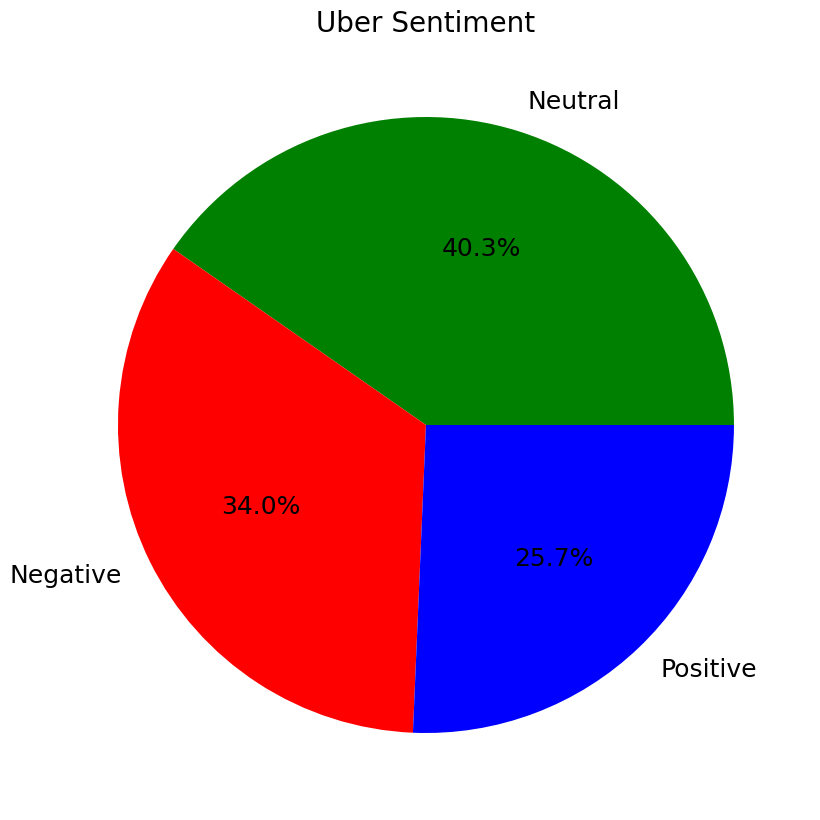

In [116]:
values = Uber['Sentiment'].value_counts()
labels = ['Neutral','Negative','Positive']
colors = ['Green','Red','Blue']

plt.figure(figsize=(10,10))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',textprops={'fontsize':18})
plt.title('Uber Sentiment',fontsize=20)
plt.show()

### Lyft Sentiment Values

In [100]:
Lyft['Sentiment'].value_counts(normalize=True)

neutral     0.394537
negative    0.319387
positive    0.286076
Name: Sentiment, dtype: float64

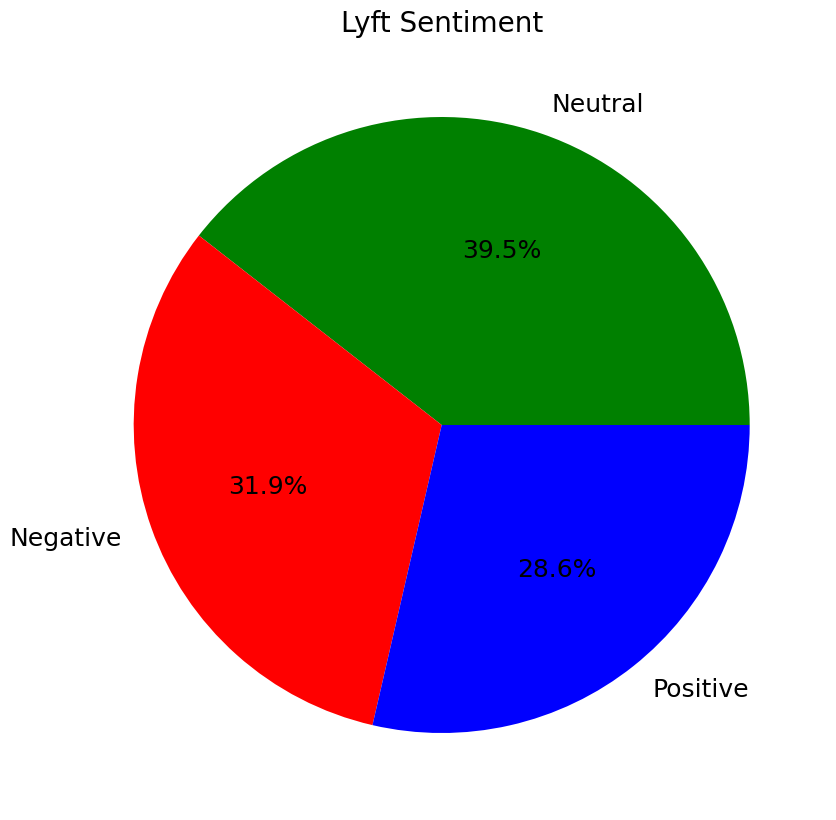

In [117]:
values = Lyft['Sentiment'].value_counts()
labels = ['Neutral','Negative','Positive']
colors = ['Green','Red','Blue']

plt.figure(figsize=(10,10))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',textprops={'fontsize':18})
plt.title('Lyft Sentiment',fontsize=20)
plt.show()

These values makes much more sense than what I was getting from VADER, I expected the positive values to be the lowest occuring in the set.

### Breaking Down DataFrames by Sentiment 

In [101]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

In [102]:
Uber_Pos = Uber.loc[Uber['Sentiment']=='positive']
Uber_Neg = Uber.loc[Uber['Sentiment']=='negative']
Lyft_Pos = Lyft.loc[Lyft['Sentiment']=='positive']
Lyft_Neg = Lyft.loc[Lyft['Sentiment']=='negative']

### Uber Positive Tweets

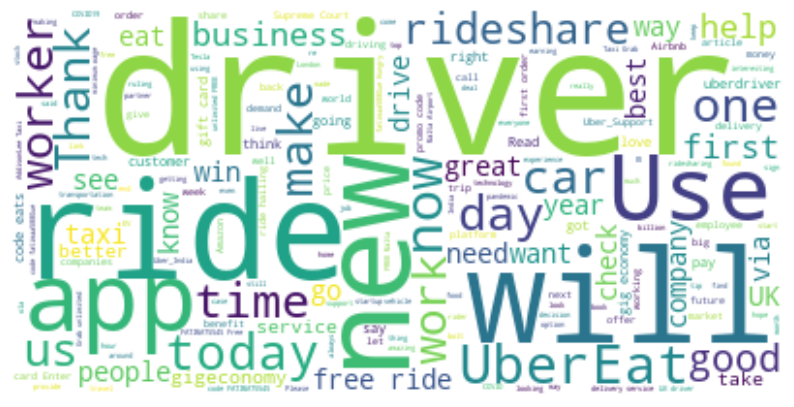

In [109]:
text = "".join(tweet for tweet in Uber_Pos.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co','s','amp','u'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Words to look into for Uber Positive data: 

* driver
* ride
* app 
* new 
* good

In [119]:
Uber_Pos.loc[Uber_Pos['Text'].str.contains('driver',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no designated or enforced @Uber and @lyft areas and #uber #lyft drivers just parking and waiting wherever they please and no @MiamiDadePD in sight @MayorDaniella,RafaelAntun,en,positive
30,32,2021-07-27 18:20:17+00:00,1420086655038500866,"Delivery fee on order is $2. Restaurant is about 5/10 min bike ride away in NYC. Let’s say Uber takes another $2 from restaurant. Uber can prob group 7 other orders to keep the delivery driver busy for the hour…unit economics only work at scale, only #Uber #doordash can do this https://t.co/DsDbfwwjw6",HudsonFarWest,en,positive
55,57,2021-07-27 15:45:51+00:00,1420047791514996737,Booking a cab never looked easier!\n\n#uxdesigner #ultimateuiux #uxdesigner #uxdesign #uiuxdesign #uxinspiration #uxdesigner #uiuxdesigner #designtips #appdesign #uxinspiration #designtools #uber #ubertaxi #taxi #taxidriver #ola #smartwatch #applewatch #applewatchseries5 #uiux #ux https://t.co/lR58qFvC0h,StudioAbt,en,positive
130,135,2021-07-27 01:02:25+00:00,1419825468740673537,"Earn $1,600 guaranteed by driving with Lyft in Suffolk County. Apply here, and give 100 rides in 30 days: https://t.co/fLstWgWPzQ Terms apply.#Uber #lyft #driver",worldwideshipp3,en,positive
158,165,2021-07-26 18:08:08+00:00,1419721211043516416,"He wanted to be the pastor of a church, but ended up being an #Uber and #Lyft driver. Yet he feels this is exactly where God wants him. His ""church"" turned out to be on wheels and he sees his congregation one person at a time https://t.co/Zy9kM0aTnL @uber @lyft @pastors https://t.co/iDvwiYMRWq",thechristianhrt,en,positive
184,191,2021-07-26 14:37:22+00:00,1419668169887731720,We cater to Uber and Lyft drivers at Westside Tire! Ask us today about our discounts and commercial pricing! #WestsideTire #Uber #Lyft https://t.co/4DZN0nuc7J,WestsideTireMN,en,positive
230,239,2021-07-26 07:45:05+00:00,1419564413850308608,"Add to it the optionality in value from #Uber investment in driverless car technology, the business which it has hived off, but still has a stake in, and can add value in future.",_HarryVish,en,positive
246,255,2021-07-26 04:17:38+00:00,1419512206924783616,@LasVegasLocally Best #uber #vegas driver right here,DolanLawGroup,en,positive
253,262,2021-07-26 03:03:12+00:00,1419493476236808194,"Just like the #OregonTrail, you decide your next step in the journey, including what sort of car to rent, how nice to be to your customers and what hours or schedule you’d keep. It was easy to follow and a great way to story-tell the day in the life of an #Uber driver. #EXSM3989",mollypowpow,en,positive
304,316,2021-07-25 16:36:51+00:00,1419335851339812866,"So, absolute best part of my day yesterday.\n\nGets in Uber in Chicago.... Driver is Asian, awesome. \n\nSong on the radio.... “One Night In Bangkok” 😂😂😂 coincidence.... I think not! \n\n#Chicago #OnenightinBangkok #Uber",GameOn_Don,en,positive


Looks like general advertisements about drivers but also people having good experiences with drivers -- some people even referring to their uber drivers as therapists/priests/new best friends. 

In [122]:
Uber_Pos.loc[Uber_Pos['Text'].str.contains('ride',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
9,10,2021-07-27 21:28:44+00:00,1420134081564708867,Research reveals that @Uber #RideSharing services have reduced drunk driving deaths by 6.1 percent. Research only examined #Uber data. @lyft data would increase such benefits.,SharpPlaysGroup,en,positive
30,32,2021-07-27 18:20:17+00:00,1420086655038500866,"Delivery fee on order is $2. Restaurant is about 5/10 min bike ride away in NYC. Let’s say Uber takes another $2 from restaurant. Uber can prob group 7 other orders to keep the delivery driver busy for the hour…unit economics only work at scale, only #Uber #doordash can do this https://t.co/DsDbfwwjw6",HudsonFarWest,en,positive
43,45,2021-07-27 16:21:21+00:00,1420056726703906816,Get your first #Uber ride #FREE (up to $20) with invite code 'aaront3765ue'. Enjoy! 😊 Download the App ► https://t.co/x2Sl4E0EGP,aarontupaz,en,positive
51,53,2021-07-27 15:48:38+00:00,1420048491229876225,Free Lyft ride up to $20 Use my code FATIMA75545\n\nFree uber ride up to $10 Use my code: fatimaa5880ue\n\nHungry? Get $7 off your first order on #Uber Eats with my code: eats-fatimaa5880ue,Fat84a,en,positive
77,80,2021-07-27 12:42:00+00:00,1420001523686207489,"To develop an #Uber-like app, we have a pre-built and ready-to-be deployed solution, which has all the required app functionalities such as live map tracking, fare calculation, payments, trip request algo, etc. \nReach out to us to develop #ridehailing app https://t.co/nnZ8polbxy",smartDataIncLtd,en,positive
130,135,2021-07-27 01:02:25+00:00,1419825468740673537,"Earn $1,600 guaranteed by driving with Lyft in Suffolk County. Apply here, and give 100 rides in 30 days: https://t.co/fLstWgWPzQ Terms apply.#Uber #lyft #driver",worldwideshipp3,en,positive
131,137,2021-07-27 00:21:21+00:00,1419815132830576641,Get your first #Uber ride #FREE (up to $20) with invite code 'aaront3765ue'. Enjoy! 😊 Download the App ► https://t.co/x2Sl4E0EGP,aarontupaz,en,positive
138,144,2021-07-26 22:47:19+00:00,1419791467678216198,Uber and Costco are teaming up to provide same-day delivery #Uber #Costco #Delivery #Grocery #TheRideshareCO https://t.co/pQCUO28aFf,therideshareco,en,positive
157,164,2021-07-26 18:17:20+00:00,1419723524369944580,Free Lyft ride up to $20 Use my code FATIMA75545\n\nFree uber ride up to $10 Use my code: fatimaa5880ue\n\nHungry? Get $7 off your first order on #Uber Eats with my code: eats-fatimaa5880ue,Fat84a,en,positive
200,208,2021-07-26 11:21:20+00:00,1419618837264228353,Get your first #Uber ride #FREE (up to $20) with invite code 'aaront3765ue'. Enjoy! 😊 Download the App ► https://t.co/x2Sl4E0EGP,aarontupaz,en,positive


Tweet about research showing Uber has reduced drunk driving deaths by 6.1%. 

User wanting emission data associated with each ride 

Positive response to Uber Green and customers knowing they are doing something to help out with environmental issues 

A lot of tweets about free rides using discount codes

In [124]:
Uber_Pos.loc[Uber_Pos['Text'].str.contains('app',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
43,45,2021-07-27 16:21:21+00:00,1420056726703906816,Get your first #Uber ride #FREE (up to $20) with invite code 'aaront3765ue'. Enjoy! 😊 Download the App ► https://t.co/x2Sl4E0EGP,aarontupaz,en,positive
55,57,2021-07-27 15:45:51+00:00,1420047791514996737,Booking a cab never looked easier!\n\n#uxdesigner #ultimateuiux #uxdesigner #uxdesign #uiuxdesign #uxinspiration #uxdesigner #uiuxdesigner #designtips #appdesign #uxinspiration #designtools #uber #ubertaxi #taxi #taxidriver #ola #smartwatch #applewatch #applewatchseries5 #uiux #ux https://t.co/lR58qFvC0h,StudioAbt,en,positive
58,60,2021-07-27 15:03:27+00:00,1420037123315585029,"Thanks to #Apple, #Uber App Can Silently Record iPhone Screens https://t.co/MYiJYucD47",PrivacyPellicn,en,positive
77,80,2021-07-27 12:42:00+00:00,1420001523686207489,"To develop an #Uber-like app, we have a pre-built and ready-to-be deployed solution, which has all the required app functionalities such as live map tracking, fare calculation, payments, trip request algo, etc. \nReach out to us to develop #ridehailing app https://t.co/nnZ8polbxy",smartDataIncLtd,en,positive
130,135,2021-07-27 01:02:25+00:00,1419825468740673537,"Earn $1,600 guaranteed by driving with Lyft in Suffolk County. Apply here, and give 100 rides in 30 days: https://t.co/fLstWgWPzQ Terms apply.#Uber #lyft #driver",worldwideshipp3,en,positive
131,137,2021-07-27 00:21:21+00:00,1419815132830576641,Get your first #Uber ride #FREE (up to $20) with invite code 'aaront3765ue'. Enjoy! 😊 Download the App ► https://t.co/x2Sl4E0EGP,aarontupaz,en,positive
165,172,2021-07-26 16:30:49+00:00,1419696719181221888,@JayRuderman Metro stations fully accessible to #wheelchair users \nMore wheelchair-accessible vehicles on #Uber and #Lyft apps,MahtotSselassie,en,positive
190,197,2021-07-26 13:45:43+00:00,1419655170078613505,Uber for x App with super smart features to upgrade your business. Build your on-demand app highly customisable and flexible options for your enterprise needs. #UBERCLONE #uber #taxi #cryptocurrency #crypto #btc https://t.co/u465paVw6z https://t.co/OrS8eJZETQ,uberforxapp,en,positive
200,208,2021-07-26 11:21:20+00:00,1419618837264228353,Get your first #Uber ride #FREE (up to $20) with invite code 'aaront3765ue'. Enjoy! 😊 Download the App ► https://t.co/x2Sl4E0EGP,aarontupaz,en,positive
203,212,2021-07-26 10:45:37+00:00,1419609848010792968,Start your online taxi business with the best app solution. Get our ready-made uber clone app and launch your business in 72 hours. And get a free demo now. Visit https://t.co/KIrTjvpqQb\n.\n#appdevelopment #Uber #uberclone #mobileappdevelopment https://t.co/SLPMfcW8iL,ApporioInfolabs,en,positive


More tweets about downloading the app and using discount codes or building new apps similar to Uber

In [126]:
Uber_Pos.loc[Uber_Pos['Text'].str.contains('new',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
5,6,2021-07-27 22:18:04+00:00,1420146498499719169,@CTVNews This is a warming for everyone who uses #uber and #lyft. #TOpoli,BadUberX,en,positive
82,85,2021-07-27 11:56:57+00:00,1419990187317334029,Sounds like some good news! New data shows #Uber may save lives thanks to preventing drunk-driving https://t.co/13omH2WKoJ via @MorningBrew,DanMurray_CR,en,positive
124,129,2021-07-27 02:15:56+00:00,1419843969647665156,I call on #uber to add #GetVaccinated to their flashy new ad campaign #GoGetIt,heffcomm,en,positive
359,375,2021-07-25 04:59:29+00:00,1419160351396880389,"Bezos Makes History, Common Sense AI And More In This Week’s Top News\n\n#AI #technews #jeffbezos #elonmusk #robotics #SpaceX #uber \n\n@SpirosMargaris @Ronald_vanLoon \nhttps://t.co/IjULL5d9Ey",Analyticsindiam,en,positive
372,388,2021-07-25 02:50:59+00:00,1419128014630121472,Uber Eats out now. \nLink is in the bio 🔥🚨Let's go \n\n#hiphop #ubereats #uber #upcomingrapper #upcomingartist #newmusic #sahiphop #dope #rap #nastyc @ Uber https://t.co/zrrJwyqm6Y,Maestroprodigy,en,positive
402,421,2021-07-24 17:13:47+00:00,1418982758295261188,@WAVY_News Drivers get dash cams that record indoor and out! Protect yourself! And make your passengers feel safe! #Lyft #Uber ProvideCameras!,TheCheapTip,en,positive
457,478,2021-07-24 04:40:38+00:00,1418793221304508417,#Uber makes 1.2 billion dollars from #ZomatoIPO. This has happened even without Uber #investing in Zomato as it owned 10% stake in Zomato by selling Uber Eats India in 2020. #news #business #IPO #StocksToWatch,BaristaBusiness,en,positive
460,482,2021-07-24 03:14:47+00:00,1418771616155197446,"Congratulations to new Mom, @LadyDelphineB! 💫\nRead Her blog 👇on Her plans for the next little while. 📸🎥💻📱🍼\nDon't forget to send Her #Uber gift cards to help with Her travel! 🚖\nThere was only one, and now there are two! ☺💕 https://t.co/vvBClpTRUu",Nervous35749064,en,positive
512,534,2021-07-23 17:44:18+00:00,1418628048895856642,"Hi, Friday August 20th at 2pm, The Great, #Uber-Talented, #Fun Band @SimplelifeCuse is playing at the Chevy Court, at #NEWYORKSTATEFAIR at the The State Fair Grounds! Talented Members! \nEllen💃🏻🎥@ChachaCullivan",ChachaCullivan,en,positive
556,579,2021-07-23 12:50:12+00:00,1418554035368390656,@PeopleMatters2 A4. HR Leaders are already driving business. We have seen how excellence in HR function can bring phenomenal results.\n\nNew business models like #zomato or #Uber are more about providing employment to tens of thousand of people than material success.\n\n#TechHRIN @Pay_Review @zomato,IamAnurag,en,positive


More mention of Uber decreasing drunk driving rates 

Looks like quite a few mentions come from "News" tweets 

Not really anything significant here

In [128]:
Uber_Pos.loc[Uber_Pos['Text'].str.contains('good',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
82,85,2021-07-27 11:56:57+00:00,1419990187317334029,Sounds like some good news! New data shows #Uber may save lives thanks to preventing drunk-driving https://t.co/13omH2WKoJ via @MorningBrew,DanMurray_CR,en,positive
168,175,2021-07-26 15:53:31+00:00,1419687332828045313,Finger Lickin Good 🍗\n\n#OOH #OutofHome #Advertising #Marketing #OutdoorMedia #Billboards #CarWraps #VinylWraps\n #sidehustle #gigeconomy #income #extraincome #extraincomeopportunity #uber #lyft https://t.co/dIVmZRfHcv,sayITsign,en,positive
362,378,2021-07-25 04:38:33+00:00,1419155084064092163,"Shout out #Uber #UberEats \nThis is a good promo. It gives you more than enough time to achieve, and pays well if the orders don't. It's easily achievable. #DoorDash makes their challenges and sign on bonuses require full time work, a heavy market, luck and even then... Anyways. https://t.co/J1LbAzLwtH",RantsTony,en,positive
497,519,2021-07-23 19:52:15+00:00,1418660248894705665,"Hey loves, enjoy my code: eats-riat1080ue $20 off your uber eats order of $25. #UberEats #ubereats大阪 #Uber #goodfood #Enjoy",bigXdinero,en,positive
498,520,2021-07-23 19:24:23+00:00,1418653236479860738,"My Uber driver just became my good friend, pastor, accountability partner and sister in 16 miles. She said to me as she dropped me off at the airport, “this thing inside of you, this thing God has placed within you, don’t waste it.” We need an Uber Church. \n\n.\n#uber #wct https://t.co/JV1jx7DLWN",NatalieRunion,en,positive
566,589,2021-07-23 12:27:21+00:00,1418548288257630213,@mrmjwatson @Uber_Support Good to see they’re universally pathetic…almost as good as my old mate who picked up my food then decided to head home to his place &amp; pick up his phone charger…when questioned about my food he told me it would still be hot as he’d microwave at his place! #uber,davewatson9,en,positive
646,672,2021-07-22 20:06:31+00:00,1418301450506100741,"Well I enjoyed my 1st home night out out for 16 months with Siân, good food and pleasant company.\n\nOnly downer were the 2 #uber we used neither respected speed limits and the 2nd one was off like a greyhound out of the trap the nano second we got in the car and not only did …",StephenWoodmore,en,positive
722,750,2021-07-22 09:21:26+00:00,1418139109625827330,good kind people people out there i took #uber @uber last night to restaurant i took my iPod with me and as I was n car I kept looking for it couldn't find it so I thought I left in house turn-out I was right as I left uber driver told me I left my cell n car turnout was ipod,mrgq181,en,positive
741,770,2021-07-22 04:19:47+00:00,1418063200403300352,It’s amazing that people will tip you better for delivering food to them than they will for you transporting them safely from A to B. Lots of riders don’t tip at all. I would think your life is more important than your food being good/warm etc. but hey what do I know?! 🤷‍♂️ #Uber,ZacharyArost,en,positive
781,812,2021-07-21 20:46:03+00:00,1417949012775288833,"Hi all my #Uber #Lyft #Driver &amp; # Gig economy workers— have a great day and make some $$$’s!!!!\n\nThis evening, drop by the @gigeconpodcast to get in the discussion with @Jdogsparky26 LIVE on YouTube, Facebook, Twitch(?), &amp; Discord!\n9pm EST/6pm PST~\n\n“havin’ a good time” -WSP",RideshareRodeo,en,positive


More tweets about drunk driving rates 

Positive tweets about Uber continuing to require masks 

### Uber Negative Tweets

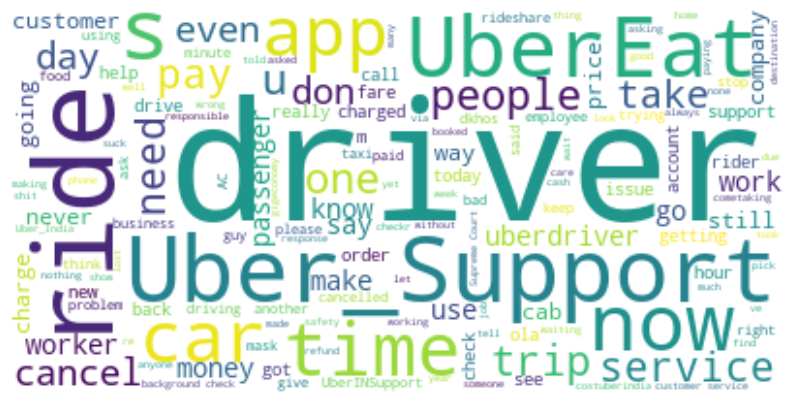

In [110]:
text = "".join(tweet for tweet in Uber_Neg.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co','amp','want','will'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Words to look into for Uber Negative data: 

* driver
* ride
* UberEat
* cancel 
* time 
* Uber_Support

In [130]:
Uber_Neg.loc[Uber_Neg['Text'].str.contains('driver',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
18,20,2021-07-27 20:13:11+00:00,1420115067480289289,$100+ fares and 2-hour wait times: What the #Uber and #Lyft driver shortage means for you https://t.co/bWDVADzG9k,LimoGame,en,negative
20,22,2021-07-27 20:00:58+00:00,1420111995815165961,Nothing like feeling like #Uber is limiting my rides... Patterns paint a dirty picture. So apparently after making $150+ they start giving me 1 rider an hour. Who else experiences this!? #uberdriver,rockstarmaxey,en,negative
23,25,2021-07-27 19:19:04+00:00,1420101450668126209,@Uber STOP SENDING DRIVERS WHO DONT SPEAK ENGLISH!!!!!! #uber #fail #badservice,BrantsRants,en,negative
40,42,2021-07-27 16:32:48+00:00,1420059608970846210,#Uber #captain cancel after picking me up because they refuse credit cards as payment method!! @Uber I waited for 30 minutes at the street. #horrible #taxi #driver,fofofairy,en,negative
57,59,2021-07-27 15:11:42+00:00,1420039198388539393,"@UberINSupport I don’t see any thred u r wrong if it’s not money you think , it’s about time , your drivers little scam , and your routine scam or #uber #uberscam ,",faiyaz_a_khan,en,negative
59,61,2021-07-27 15:02:33+00:00,1420036895443144708,"For all the #Uber drivers out there… if we get quiet while you’re spouting off your crazy #COVID19 conspiracy theories, know that we definitely don’t agree with you, we’re just being polite because we want to get to our destination alive.",ejhaugan,en,negative
61,63,2021-07-27 14:34:52+00:00,1420029928813236227,Now I understand why there's no #uber drivers .. There @Uber_Support is bad.,Gsxr14s,en,negative
63,65,2021-07-27 14:29:16+00:00,1420028517803302921,"Extremely disappointed with #uber scheduled service-booked a week in advance, but driver did not show up, also did not cancel, no apologies were made, no customer service to reach out to. #uber failed us big time. Recommend against scheduling service with #uber. #chaos @Uber",mocancem,en,negative
67,69,2021-07-27 14:10:33+00:00,1420023807776075778,"@Uber u ass holes ur drivers started trip without me &amp; u fuckers have debit my wallet , m gonna promote paid ads #uberscam #UberGo #Uber #uninstall Uber \nYou spoiled my time , \n\nDM me for every uninstall Uber App and every negative review on Uber play store or iOS will pay Rs 10",faiyaz_a_khan,en,negative
74,77,2021-07-27 12:57:15+00:00,1420005361260564480,I got on an #Uber this morning and the driver literally kept saying I was Filipino after I told him I was not and he kept saying his ex was Filipino. When I told him I was engaged he continued to say I had a fat face and fat nose. #Sexualharassment ?? Do better Uber. #NJ #Affzal,ZorinRobin,en,negative


Drivers worried that Uber is limiting rides -- once they make a certain amount, start giving them fewer riders. Capping how much a driver can make

Users annoyed about not accepting credit cards 

Issues with scheduled rides -- drivers not showing up/canceling and no customer support to reach out to 

Riders having issues with drivers making inappropriate comments -- maybe a behavioral training for new drivers in order to start driving? 

Adding an option for drivers to specify a ride distance limit? 

In [133]:
Uber_Neg.loc[Uber_Neg['Text'].str.contains('ride',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
19,21,2021-07-27 20:04:33+00:00,1420112897737375749,"Like I said, #goodbyeUber! @Uber’s standards are terrible, and their customer service response does nothing to help their passengers. Deleted! No future ride-shares will happen with this company. @Uber_Support #Uber https://t.co/V6Mi96yVsQ https://t.co/wsI95JyM3B",4katiemack,en,negative
20,22,2021-07-27 20:00:58+00:00,1420111995815165961,Nothing like feeling like #Uber is limiting my rides... Patterns paint a dirty picture. So apparently after making $150+ they start giving me 1 rider an hour. Who else experiences this!? #uberdriver,rockstarmaxey,en,negative
64,66,2021-07-27 14:26:59+00:00,1420027945150828559,"@dkhos #uberceo #uber #bbb #Rideshare #cheatingamerica how is that uber is largely in America but we can not seem to get any customer service right here, we speak to ppl overseas who have no clue what we are asking of them &amp; all they do is read a script",OUTSPOKEN_Nazi,en,negative
101,106,2021-07-27 07:46:00+00:00,1419927034415906817,"After lockdown, I could see some major issues with cab drivers.They were accepting the ride only if it s a cash mode of payment &amp; cancelling the ride if prime model car s selected 4 hatchbacks rate.These question the safety of women whn they book cab n an emergency.#OLA #Uber",JeyaprabhaJesl1,en,negative
125,130,2021-07-27 02:03:06+00:00,1419840738314047496,"Marci Josephson holds the arm of her husband, Seymour, during opening arguments in the trial of the man accused in Samantha Josephson slaying. Samantha was killed after getting into a car she thought was her Uber ride in March 2019 in Columbia’s 5 Points. @postandcourier #uber https://t.co/Vw2LAjdlqZ",jac2photo,en,negative
128,133,2021-07-27 01:39:26+00:00,1419834783283089411,While booking #OLA and #uber there first question is ‘where you want to go’ and CASH payment only or else they will cancel your ride. This is what happening with me and everybody. Please look into this matter. #ola and #uber.,vickyraji0105,en,negative
147,154,2021-07-26 20:28:35+00:00,1419756557345034260,"Drivers! Check your fare after every #Uber ride, if it had surge. On trips that have been pre-scheduled by the passenger, the system has not been applying the surge to them, at least not for me in Los Angeles.",uber_jedi,en,negative
155,162,2021-07-26 19:04:39+00:00,1419735432854712321,@uber @Uber_Support I have a dashcam and I do Uber rides...a customer is disputing the ride and I am NOT able to cash out!! I need help #ihateurservice #ubermymoney #uber #uberprolems,ihateurservice_,en,negative
178,185,2021-07-26 14:54:08+00:00,1419672390414569473,Why is one of America Biggest Companies Customers Service Overseas 🤔 #uber @Uber_Support #Rideshare they have no clue what they are doing saying they waiting on @checkr &amp; check reports are already done,OUTSPOKEN_Nazi,en,negative
181,188,2021-07-26 14:44:02+00:00,1419669847626104843,"@checkr @Uber_Support are the worst &amp; are really out here causing financial Harm to people lives, #bbb #share #Rideshare #Independentcontractors #uber #overseasjobs",OUTSPOKEN_Nazi,en,negative


More about issues with drivers cancelling on riders 

In [137]:
Uber_Neg.loc[Uber_Neg['Text'].str.contains('UberEat',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
53,55,2021-07-27 15:47:46+00:00,1420048274812293122,Interesting new #Ubereats FAIL @Uber @Ubereats I received notification directly after accepting offer (I know this Marriott well). But the problem is: Custo NOT in Marriott. Why try to help by making us look silly &amp;&amp; #Uber still needs to show EXACT ADDRESS ONCE AND FOR ALL #uber https://t.co/yYGBPvHN7F,DlvryDryvr,en,negative
60,62,2021-07-27 14:54:30+00:00,1420034869623676932,"@Uber you can kiss my ass goodbye. I wore that damn #facemask the entire time I was in that car - I didn't want to, but I did. I've been the #Uber and #UberEats girl since the beginning, but no more. We're done. #Lyft and #GrubHub In with y'all now. https://t.co/5ccIzH1lwO",KaraStockton,en,negative
103,108,2021-07-27 07:38:37+00:00,1419925174737117204,"Never using @UberEats again. Code didn't work, whole meal ruined and only offered £1 refund. Plus unable to ring anyone to complain. #jokecompany #ripoff #nocustomerservice #uber #UberEats",marksmccarthy7,en,negative
105,110,2021-07-27 07:14:17+00:00,1419919050646433792,"THIS IS FRAUD, LETS SEE IF THE @FCA AND @UKSFO TAKE ACTION AGAINST @UberEats \n\n@rustyrockets @LaurenKGurley @JuliaHB1 @VestySarah @UBERTRUTH2 @HumanRights4UK @Consumers_Int @WhichUK @BBCWatchdog @curryspcworld #RateMyTakeaway #Ubered #UberEatsPromoCode #Uber #UberEats #uberuk https://t.co/Cl4ND7bzqN",Uber__Cheats,en,negative
179,186,2021-07-26 14:52:37+00:00,1419672005620551686,"Hey @Uber I still can't get your Uber eats driver app to work after almost a week and your site and app still won't load for me enough to even email you. It just crashes and says ""internal server error"". Why hasn't this been fixed yet? #uber #ubereats #delivery #app",Jimfear_43,en,negative
213,222,2021-07-26 09:24:54+00:00,1419589536800133121,UberEats should be complaint to consumer protection authority for its scams. Charged me twice in two orders which was scheduled and delivered to Australia. Sadly the cost is above 10k LKR. Won’t reply for any of my support requests!!!\n@UberEats @Uber_Support @Uber\n#uber #ubereats,rajebro,en,negative
271,282,2021-07-25 23:02:39+00:00,1419432941793468424,Uber still mis-calculates highway time like you're flyin' Virgin Galactic. We don't need the ETA @Uber we just need miles and still need exact dropoff + exact payout while you're at it thx #Uber #Ubereats https://t.co/YC9IFtpEr9,DlvryDryvr,en,negative
330,344,2021-07-25 11:25:32+00:00,1419257503519547392,Spread the word\n\nDONT USE @UBER/@UBEREATS \n\n#Unlawful #Ubered #UberEatsPromoCode #FREEFOOD #uberuk #SCAM #LiarJohnson #JohnsonLies #DontUseUberEats #DeleteUber #StopUsingUberEats #BoycottUberEats #Uber #Avoidance #Wagetheft #Exploitation #BMWCE04 #bornelectric https://t.co/eBwzJFmEAQ,Uber__Cheats,en,negative
335,350,2021-07-25 10:34:21+00:00,1419244623181094919,"@UberUKsupport still nothing from you, what is going on?! @McDonaldsUK #shockingcustomerservice #UberEats #uber #mcdonalds",lloydy2410,en,negative
347,363,2021-07-25 06:52:20+00:00,1419188751855652864,@Uber_Support Tagging all #uber accounts hoping someone know what the Hell they're doing. @UberEng @UberDevelopers @Uber_India @UberEats \n\nhey @AskLyft see chain above - any chance you guys top this very very low bar set by @Uber_Support ?,JZthewrapper,en,negative


Majority of complaints revolving around lack of customer support

In [138]:
Uber_Neg.loc[Uber_Neg['Text'].str.contains('cancel',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
40,42,2021-07-27 16:32:48+00:00,1420059608970846210,#Uber #captain cancel after picking me up because they refuse credit cards as payment method!! @Uber I waited for 30 minutes at the street. #horrible #taxi #driver,fofofairy,en,negative
41,43,2021-07-27 16:25:23+00:00,1420057742329397248,#Uber #captain cancel after picking me up because they refuse credit cards as payment method!! @Uber I’m waiting for 30 minutes at the street.,fofofairy,en,negative
42,44,2021-07-27 16:24:26+00:00,1420057500636925959,#Uber #captain cancel after picking me up because they refuse credit cards as payment method!! @Uber,fofofairy,en,negative
63,65,2021-07-27 14:29:16+00:00,1420028517803302921,"Extremely disappointed with #uber scheduled service-booked a week in advance, but driver did not show up, also did not cancel, no apologies were made, no customer service to reach out to. #uber failed us big time. Recommend against scheduling service with #uber. #chaos @Uber",mocancem,en,negative
80,83,2021-07-27 12:21:07+00:00,1419996269926227975,#Uber driver with auto OD33C1091 misbehaved because we denied to pay extra 15 rupees above the charge.If someone cancels the uber then he has to pay 15 rupees.Its a trap.,amitparidabick1,en,negative
101,106,2021-07-27 07:46:00+00:00,1419927034415906817,"After lockdown, I could see some major issues with cab drivers.They were accepting the ride only if it s a cash mode of payment &amp; cancelling the ride if prime model car s selected 4 hatchbacks rate.These question the safety of women whn they book cab n an emergency.#OLA #Uber",JeyaprabhaJesl1,en,negative
128,133,2021-07-27 01:39:26+00:00,1419834783283089411,While booking #OLA and #uber there first question is ‘where you want to go’ and CASH payment only or else they will cancel your ride. This is what happening with me and everybody. Please look into this matter. #ola and #uber.,vickyraji0105,en,negative
173,180,2021-07-26 15:13:31+00:00,1419677265315594245,Kaha jana hey .once you tell them . They cancel. @Uber_Mumbai @Uber #uber #ubermumbai . Just can't trust it anymore . https://t.co/qZY0TzqyVb,ankeetd,en,negative
233,242,2021-07-26 07:16:21+00:00,1419557183918772224,@Uber_India @UberINSupport Your uber drivers need to have some proper training. Or uber is only into making money by charging fee for cancellation. #Uber #cabs #worst #services https://t.co/m53NUT8eBX,sunny1709,en,negative
237,246,2021-07-26 06:38:28+00:00,1419547651486355460,"Hey @Uber_India !\n\nI was charged 80 rupees extra on my last ride, the receipt said it's coz of some old ride.\n\nThe ride referred to was cancelled by the driver, who wasn't willing to come to my location. Please initiate refund.\n\n@Uber_Support @Uber\n\n#Uber #UberIndia https://t.co/oGZHt79Oeb",sunnysingh695,en,negative


Not surprising that all of these tweets are about issues with drivers cancelling for no reason or being charged for cancellign when a ride is changed on a rider

In [139]:
Uber_Neg.loc[Uber_Neg['Text'].str.contains('time',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
18,20,2021-07-27 20:13:11+00:00,1420115067480289289,$100+ fares and 2-hour wait times: What the #Uber and #Lyft driver shortage means for you https://t.co/bWDVADzG9k,LimoGame,en,negative
35,37,2021-07-27 17:13:14+00:00,1420069782062346245,I am communicating with #Uber via email and Twitter DM for customer support. Its been 3 hrs and I have repeated the same process and explanation of issue 5 times. Why is it so difficult to get proper Uber Support?! https://t.co/yQGP1Dwtnp,llinaseduardo,en,negative
57,59,2021-07-27 15:11:42+00:00,1420039198388539393,"@UberINSupport I don’t see any thred u r wrong if it’s not money you think , it’s about time , your drivers little scam , and your routine scam or #uber #uberscam ,",faiyaz_a_khan,en,negative
60,62,2021-07-27 14:54:30+00:00,1420034869623676932,"@Uber you can kiss my ass goodbye. I wore that damn #facemask the entire time I was in that car - I didn't want to, but I did. I've been the #Uber and #UberEats girl since the beginning, but no more. We're done. #Lyft and #GrubHub In with y'all now. https://t.co/5ccIzH1lwO",KaraStockton,en,negative
63,65,2021-07-27 14:29:16+00:00,1420028517803302921,"Extremely disappointed with #uber scheduled service-booked a week in advance, but driver did not show up, also did not cancel, no apologies were made, no customer service to reach out to. #uber failed us big time. Recommend against scheduling service with #uber. #chaos @Uber",mocancem,en,negative
67,69,2021-07-27 14:10:33+00:00,1420023807776075778,"@Uber u ass holes ur drivers started trip without me &amp; u fuckers have debit my wallet , m gonna promote paid ads #uberscam #UberGo #Uber #uninstall Uber \nYou spoiled my time , \n\nDM me for every uninstall Uber App and every negative review on Uber play store or iOS will pay Rs 10",faiyaz_a_khan,en,negative
110,115,2021-07-27 06:47:40+00:00,1419912355052507165,@UberUKsupport What kind of a reply is this? U may prefer a “constructive resolution” but that doesn’t solve anything for me. U have wasted my time &amp; not done anything about it. It’s ridiculous how u think u can get away with that. How have u resolved this?! Awful service! #UBER https://t.co/i4xyXB3fsi,rajeshramz,en,negative
115,120,2021-07-27 05:44:23+00:00,1419896429666095116,Same time #Uber was showing 64.73$ but un fortunately cab was unavailable!,sathyka,en,negative
121,126,2021-07-27 03:52:08+00:00,1419868180126834689,Dr. Thomas Beaver expert witness Pathologist testify today #SamanthaJosephson was stabbed more than 100 times before sh... https://t.co/pztVGRbiZj via @YouTube @DavidBegnaud @AnaCabrera @jaketapper #SouthCarolina #USA #fakeuber #UBER #whatsmyname,conchi_gonzalez,en,negative
192,199,2021-07-26 13:10:47+00:00,1419646382432919558,"Don’t waste your time making a reservation with Uber… they won’t show, and don’t communicate with you. Just wasted 45 minutes at 4 am trying to get a ride to airport. #uber #ubersucksnow #whathappened #mondaythoughts",seanmichaelsmit,en,negative


Taking too long to find a driver 

In [145]:
Uber_Neg.loc[Uber_Neg['Text'].str.contains('Uber_Support',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
19,21,2021-07-27 20:04:33+00:00,1420112897737375749,"Like I said, #goodbyeUber! @Uber’s standards are terrible, and their customer service response does nothing to help their passengers. Deleted! No future ride-shares will happen with this company. @Uber_Support #Uber https://t.co/V6Mi96yVsQ https://t.co/wsI95JyM3B",4katiemack,en,negative
61,63,2021-07-27 14:34:52+00:00,1420029928813236227,Now I understand why there's no #uber drivers .. There @Uber_Support is bad.,Gsxr14s,en,negative
87,90,2021-07-27 11:22:30+00:00,1419981519175655425,Are you going to do something about it or\nshould I consider that you are #Cheating your #customers?\n#Uber #Uber_India #UberlNSupport\n@Uber_India @Uber_Support\n@UberlNSupport #consumerprotection #JagoGrahakJago #IndianConsumer\n@consumerforum_ @jagograhakjago https://t.co/B20kZhq2GT,omkaareshwar,en,negative
100,105,2021-07-27 07:50:19+00:00,1419928121265070080,@Uber_Support Tried using this page. Why is there no phone number? #uber #hidingfromcustomers #nocustomerservice,marksmccarthy7,en,negative
116,121,2021-07-27 05:39:40+00:00,1419895241746702337,"So now @Uber_Support sends a $10 coupon for MY NEXT ORDER, except that is not what was promised. They promised a discount on tonight. Bait and switch to get me to order again. Well, they can save their $10 because I’ve deleted #uber and @Postmates forever. Principle.",PlayingBall2,en,negative
155,162,2021-07-26 19:04:39+00:00,1419735432854712321,@uber @Uber_Support I have a dashcam and I do Uber rides...a customer is disputing the ride and I am NOT able to cash out!! I need help #ihateurservice #ubermymoney #uber #uberprolems,ihateurservice_,en,negative
162,169,2021-07-26 17:13:07+00:00,1419707367072145416,"@Uber_Support my daughter told me, onTuesday 7/20 at 10 pm in Montclair NJ, driver made my daughter get out of the car saying he not allowed to go to NYC.\nHow he leave a young girl in the middle of the street late at night? @Uber @Olympics @TeamUSA @NBCOlympics #uber Manhattan",BFTano5,en,negative
178,185,2021-07-26 14:54:08+00:00,1419672390414569473,Why is one of America Biggest Companies Customers Service Overseas 🤔 #uber @Uber_Support #Rideshare they have no clue what they are doing saying they waiting on @checkr &amp; check reports are already done,OUTSPOKEN_Nazi,en,negative
180,187,2021-07-26 14:45:37+00:00,1419670246009491463,@diaknight @Uber_Support @Uber uses @checkr for their background checks. \n\n#Uber is not responsible for 3rd party services &amp; #CheckR has a disclaimer stating that none of their checks are comprehensive. https://t.co/M4dgabTlYe,RideSafeWorld,en,negative
181,188,2021-07-26 14:44:02+00:00,1419669847626104843,"@checkr @Uber_Support are the worst &amp; are really out here causing financial Harm to people lives, #bbb #share #Rideshare #Independentcontractors #uber #overseasjobs",OUTSPOKEN_Nazi,en,negative


The biggest issue here is how inaccessible Uber's Customer Support team is. This is supposed to be the main channel for getting help regarding Uber related issues but it seems that there is not enough support to get through all of the issues being raised. This dataset is a 6 month time frame and there are only about 1200 tweets that mention uber support -- that is not very many at all, given the time frame. Seems like Uber needs to hire on a social media support team that addresses these issues.

A lot of the issues are very repetitive as well and don't seem like they are being addressed -- riders upset about driver behavior, drivers not getting enough rides while riders also simultaneously complaining about not being able to find rides. Riders having refunding issues, etc. 

### Lyft Positive Tweets

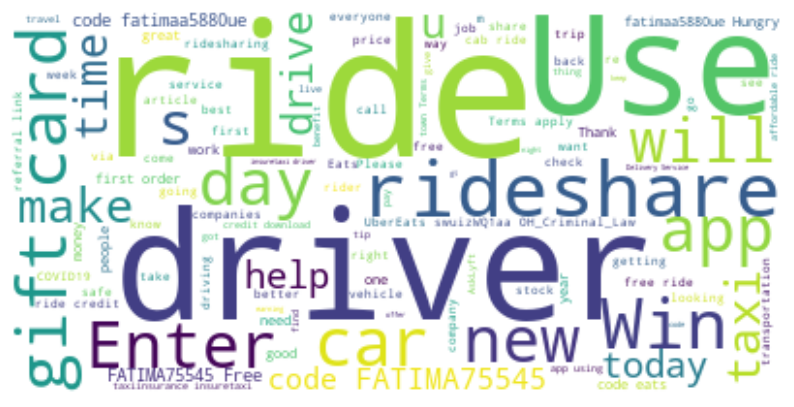

In [112]:
text = "".join(tweet for tweet in Lyft_Pos.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co','now','amp'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Words to look into for Lyft Positive data: 

* gift card 
* driver
* ride 
* User
* car 
* Win

In [167]:
Lyft_Pos.loc[Lyft_Pos['Text'].str.contains('gift card',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
27362,1325,2021-06-22 11:55:56+00:00,1407306357448052738,Celebrate T-Mobile Tuesday by entering for Chance to win up to a $5k https://t.co/IFMqbLVDnt Gift Card and More! #TmobileTuesdayAnniversaryCelebration #5KAmazonGiftCard #FreeWendysSandwich #Lyft #Redbox https://t.co/EZEZcdnUAV,shopnow_deals,en,positive
28577,9304,2021-04-03 15:21:29+00:00,1378367056408584198,📢 CONGRATULATIONS👉 Will has won a $50 gift card for #Lyft to enjoy some time out of the house... without having to worry about driving their own car! 🚗 😲 \nhttps://t.co/s8WlH6Lek5 | @OH_Criminal_Law https://t.co/SbSC5mz8X4,OH_Criminal_Law,en,positive
28618,9395,2021-03-31 23:47:14+00:00,1377407168391958529,Want to win ENTER TO WIN $50 GIFT CARD for #LYFT!? I just entered to win and you can too. https://t.co/xH7JwwT7wt,myway070,en,positive
28619,9396,2021-03-31 23:46:53+00:00,1377407079560798209,👉 Win a $50 gift card for #Lyft 🚗😲 Enter here: https://t.co/QMMGBOsXMF 💯 @OH_Criminal_Law https://t.co/xH7JwwT7wt,myway070,en,positive
28620,9398,2021-03-31 23:06:51+00:00,1377397005438251010,👉 Win a $50 gift card for #Lyft 🚗😲 Enter here: https://t.co/9WJWbPG0u5 💯 @OH_Criminal_Law https://t.co/HnI4wld6C3,rainingcali,en,positive
28621,9399,2021-03-31 21:58:17+00:00,1377379750985920513,👉 Win a $50 gift card for #Lyft 🚗😲 Enter here: https://t.co/dcsCcxNfBN 💯 @OH_Criminal_Law https://t.co/61qwGzZ342,groogruxking40,en,positive
28625,9408,2021-03-31 17:55:18+00:00,1377318602752335875,👉 Win a $50 gift card for #Lyft 🚗😲 Enter here: https://t.co/swuizWQ1aa 💯 @OH_Criminal_Law https://t.co/A6AJS4xUD1,willgriesmer,en,positive
28626,9409,2021-03-31 17:55:17+00:00,1377318598855819269,👉 Win a $50 gift card for #Lyft 🚗😲 Enter here: https://t.co/swuizWQ1aa 💯 @OH_Criminal_Law https://t.co/ByrSq3gW80,willgriesmer,en,positive
28628,9411,2021-03-31 16:51:24+00:00,1377302520234700806,👉 Win a $50 gift card for #Lyft 🚗😲 Enter here: https://t.co/zAoQwcXLHp 💯 @OH_Criminal_Law https://t.co/dswAIYc7rs,jlowewins,en,positive
28633,9426,2021-03-31 02:17:13+00:00,1377082523767992324,👉 Win a $50 gift card for #Lyft 🚗😲 Enter here: https://t.co/YSr3NEuUAz 💯 @OH_Criminal_Law https://t.co/2kbuS9YYJ0,dataentrytard3,en,positive


These are just about promotional offers 

In [178]:
Lyft_Pos.loc[Lyft_Pos['Text'].str.contains('driver',case=False)].head(100)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no designated or enforced @Uber and @lyft areas and #uber #lyft drivers just parking and waiting wherever they please and no @MiamiDadePD in sight @MayorDaniella,RafaelAntun,en,positive
130,135,2021-07-27 01:02:25+00:00,1419825468740673537,"Earn $1,600 guaranteed by driving with Lyft in Suffolk County. Apply here, and give 100 rides in 30 days: https://t.co/fLstWgWPzQ Terms apply.#Uber #lyft #driver",worldwideshipp3,en,positive
158,165,2021-07-26 18:08:08+00:00,1419721211043516416,"He wanted to be the pastor of a church, but ended up being an #Uber and #Lyft driver. Yet he feels this is exactly where God wants him. His ""church"" turned out to be on wheels and he sees his congregation one person at a time https://t.co/Zy9kM0aTnL @uber @lyft @pastors https://t.co/iDvwiYMRWq",thechristianhrt,en,positive
184,191,2021-07-26 14:37:22+00:00,1419668169887731720,We cater to Uber and Lyft drivers at Westside Tire! Ask us today about our discounts and commercial pricing! #WestsideTire #Uber #Lyft https://t.co/4DZN0nuc7J,WestsideTireMN,en,positive
402,421,2021-07-24 17:13:47+00:00,1418982758295261188,@WAVY_News Drivers get dash cams that record indoor and out! Protect yourself! And make your passengers feel safe! #Lyft #Uber ProvideCameras!,TheCheapTip,en,positive
493,515,2021-07-23 20:37:54+00:00,1418671739320557570,How the @TheDriversCoop built a worker-owned alternative to #Uber and #Lyft. @FastCompany https://t.co/zLg9oVOiZS,earthlyhands,en,positive
562,585,2021-07-23 12:33:42+00:00,1418549885700247558,#Uber and #Lyft #drivers #strike #nationwide for better #pay #cbsnews https://t.co/cL8YcDoI6C #rideshare #inflation #tech #biden #powell #centralbanks #us #mkt,BoilerRoomTweet,en,positive
751,780,2021-07-22 02:32:27+00:00,1418036187688734724,Employees STRIKE! Uber and Lyft drivers strike Nationwide for better pay! Now Cabs about to get back on and popping! @YMcTier #jobs #Uber #Lyft #Strike #Nationwide #money #mess \n\n https://t.co/xgHYB5BpIa,YMcTier,en,positive
781,812,2021-07-21 20:46:03+00:00,1417949012775288833,"Hi all my #Uber #Lyft #Driver &amp; # Gig economy workers— have a great day and make some $$$’s!!!!\n\nThis evening, drop by the @gigeconpodcast to get in the discussion with @Jdogsparky26 LIVE on YouTube, Facebook, Twitch(?), &amp; Discord!\n9pm EST/6pm PST~\n\n“havin’ a good time” -WSP",RideshareRodeo,en,positive
790,821,2021-07-21 19:31:28+00:00,1417930244875374596,#Uber and #Lyft drivers are striking to form a union. Go get 'em guys. Finally getting smart.,Santamoniker,en,positive


* Talk about drivers striking for better pay (not really a positive thing) 

* A positive comment about Uber and Lyft creating a free market (anyone with a car can drive, not jus those with taxis) 

* A lot of praise for drivers taking control of their situation and trying to unionize/ demand better wages 

* There is a competitor popping up in NY with 2,500 drivers 

In [179]:
Lyft_Pos.loc[Lyft_Pos['Text'].str.contains('ride',case=False)].head(100)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
9,10,2021-07-27 21:28:44+00:00,1420134081564708867,Research reveals that @Uber #RideSharing services have reduced drunk driving deaths by 6.1 percent. Research only examined #Uber data. @lyft data would increase such benefits.,SharpPlaysGroup,en,positive
51,53,2021-07-27 15:48:38+00:00,1420048491229876225,Free Lyft ride up to $20 Use my code FATIMA75545\n\nFree uber ride up to $10 Use my code: fatimaa5880ue\n\nHungry? Get $7 off your first order on #Uber Eats with my code: eats-fatimaa5880ue,Fat84a,en,positive
130,135,2021-07-27 01:02:25+00:00,1419825468740673537,"Earn $1,600 guaranteed by driving with Lyft in Suffolk County. Apply here, and give 100 rides in 30 days: https://t.co/fLstWgWPzQ Terms apply.#Uber #lyft #driver",worldwideshipp3,en,positive
157,164,2021-07-26 18:17:20+00:00,1419723524369944580,Free Lyft ride up to $20 Use my code FATIMA75545\n\nFree uber ride up to $10 Use my code: fatimaa5880ue\n\nHungry? Get $7 off your first order on #Uber Eats with my code: eats-fatimaa5880ue,Fat84a,en,positive
243,252,2021-07-26 04:42:52+00:00,1419518559504371716,"Key takeaways for startups thinking to develop a ride-sharing app, one who are in the plan of being the next Uber! https://t.co/PfRhcBiV1U #ridesharingapp #lyft #uber #blablacar #startup #entrepreneur #businessplan #developers #appdev #ridesharingbusinessmodel #MobileApp #appdev",CMARIXTechLabs,en,positive
299,311,2021-07-25 17:04:59+00:00,1419342931828396032,Free Lyft ride up to $20 Use my code FATIMA75545\n\nFree uber ride up to $10 Use my code: fatimaa5880ue\n\nHungry? Get $7 off your first order on #Uber Eats with my code: eats-fatimaa5880ue,Fat84a,en,positive
398,417,2021-07-24 18:28:53+00:00,1419001656805634053,Free Lyft ride up to $20 Use my code FATIMA75545\n\nFree uber ride up to $10 Use my code: fatimaa5880ue\n\nHungry? Get $7 off your first order on #Uber Eats with my code: eats-fatimaa5880ue,Fat84a,en,positive
474,496,2021-07-24 00:01:09+00:00,1418722884923666438,"If you love the free podcast, join us on patreon! You get to hear extra pee jug stories. Isn't that worth it?????\n\nhttps://t.co/p7UpEcKe51\n\n #podcast #patreon #uber #lyft #rideshare #gigeconomy #doordash #ubereats #grubhub #amazonflex #gigeconomypodcast https://t.co/FvzG9O6htd",gigeconpodcast,en,positive
530,552,2021-07-23 15:45:01+00:00,1418598029792272389,Free Lyft ride up to $20 Use my code FATIMA75545\n\nFree uber ride up to $10 Use my code: fatimaa5880ue\n\nHungry? Get $7 off your first order on #Uber Eats with my code: eats-fatimaa5880ue,Fat84a,en,positive
562,585,2021-07-23 12:33:42+00:00,1418549885700247558,#Uber and #Lyft #drivers #strike #nationwide for better #pay #cbsnews https://t.co/cL8YcDoI6C #rideshare #inflation #tech #biden #powell #centralbanks #us #mkt,BoilerRoomTweet,en,positive


* Looks like Lyft is offering "streaks and ride bonuses" -- driver says these are making up for the lack of tips due to increased prices

* A lot of promotional tweets about free rides again 

In [173]:
Lyft_Pos.loc[Lyft_Pos['Text'].str.contains('User',case=False)]

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
165,172,2021-07-26 16:30:49+00:00,1419696719181221888,@JayRuderman Metro stations fully accessible to #wheelchair users \nMore wheelchair-accessible vehicles on #Uber and #Lyft apps,MahtotSselassie,en,positive
900,933,2021-07-20 22:07:00+00:00,1417606994941317131,In March 2021 Uber and Lyft launched the first Industry Sharing Safety Program. This collaboration will impact all the community of gig workers and app users.\nhttps://t.co/Lc4nLtaj4K\n\n#safety #lyft #uber #rideshare #gigworkers https://t.co/DleGdTXvXj,best_referral,en,positive
2287,2360,2021-07-08 15:07:00+00:00,1413152644273643526,In March 2021 Uber and Lyft launched the first Industry Sharing Safety Program. This collaboration will impact all the community of gig workers and app users.\nhttps://t.co/Lc4nLtrTWi\n\n#safety #lyft #uber #rideshare #gigworkers https://t.co/rwy15HiFNU,best_referral,en,positive
6671,8070,2021-06-01 16:46:02+00:00,1399769218590154754,"Here's an interesting 3 part tutorial - Taxi booking platform - User, Driver and Admin apps - using @Ionicframework , @nodejs and #mysql https://t.co/ehDGsvJk58 \n#taxi #TaxiDriver #uber #Lyft https://t.co/RWT10JI53M",EnappdStore,en,positive
7357,9624,2021-05-27 12:39:00+00:00,1397895108838629387,"If you’re a frequent rideshare user, you’ll want to know how to earn the most rewards possible on every purchase. \n\n#Uber #Lyft #rewards #travel #rideshare \nhttps://t.co/PpeoMxF2nI",upgradedpoints,en,positive
8169,11571,2021-05-20 21:21:41+00:00,1395489932899094529,You now have the option to turn your rideshare time into productive time and earn cash while you roll to your destination. Android users can now download the App. @paytrippa #ridesharing #mobility #uber #lyft #freetransportation,paytrippa,en,positive
11206,16662,2021-04-28 19:30:03+00:00,1387489306571284486,Uber app in U.S. to enable users to book vaccines and rental cars #UberVaccineRide #WalgreensPartnership #Hertz #AvisBudgetGroupInc #Vaccines #Walgreens #LyftInc #Uber https://t.co/pb4SOPOQuE,ETAuto,en,positive
14097,19642,2021-04-06 12:32:54+00:00,1379411795425779715,In March 2021 Uber and Lyft launched the first Industry Sharing Safety Program. This collaboration will impact all the community of gig workers and app users.\nhttps://t.co/lhf3yizSoi\n\n#safety #lyft #uber #rideshare #gigworkers https://t.co/YhN1TOnAll,best_referral,en,positive
16556,22178,2021-03-20 22:21:16+00:00,1373399268216700928,"The only thing @AskLyft is good for is deactivating your account.\nWhat a ""fantastic"" user experience from @lyft even with their Lyft Pink membership. LOL\n\n@Uber here I come.\n#CustomerService #lyftpink #Uber https://t.co/Zxae7Xb3lS",mezlako,en,positive
17360,23000,2021-03-17 15:08:03+00:00,1372203079408492544,"Unlike centralized competitors, Eva’s app is based on blockchain technology, which is used to protect the data of its users and avoid centralization around a single corporate entity. \nhttps://t.co/E65X55XhLO\n#blockchain #eos #cooperatives #uber #lyft https://t.co/XamZcqrSNY",hackernoon,en,positive


* Most positive tweet in here is the last about being able to easily get a Lyft when there were no Ubers available -- wouldn't say this seems to occur enough to use it as an edge but it is of course something that could be strived for. 

In [171]:
Lyft_Pos.loc[Lyft_Pos['Text'].str.contains('car',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
168,175,2021-07-26 15:53:31+00:00,1419687332828045313,Finger Lickin Good 🍗\n\n#OOH #OutofHome #Advertising #Marketing #OutdoorMedia #Billboards #CarWraps #VinylWraps\n #sidehustle #gigeconomy #income #extraincome #extraincomeopportunity #uber #lyft https://t.co/dIVmZRfHcv,sayITsign,en,positive
243,252,2021-07-26 04:42:52+00:00,1419518559504371716,"Key takeaways for startups thinking to develop a ride-sharing app, one who are in the plan of being the next Uber! https://t.co/PfRhcBiV1U #ridesharingapp #lyft #uber #blablacar #startup #entrepreneur #businessplan #developers #appdev #ridesharingbusinessmodel #MobileApp #appdev",CMARIXTechLabs,en,positive
301,313,2021-07-25 16:49:40+00:00,1419339077241901061,"If you’re interested in working for a delivery company, here are the top delivery companies and our best resources about them.\n\nGet in touch with us at 👉https://t.co/woCFNFRoWn\n\n#Chicago #Delivery #Services #food #Doordash #Grubhub #Caviar #UberEats #Uber #Lyft #ChicagoCarRental https://t.co/a8aRkRAxEZ",PINNICOCARS,en,positive
459,481,2021-07-24 03:19:19+00:00,1418772758817878019,"This woman gets out of the car, dressed head to toe in tight black leather, she's a perfect pear shaped lady... looking like a human butt-plug. ##Uber #Lyft #FridayNight",CompanyManComic,en,positive
799,830,2021-07-21 17:58:40+00:00,1417906890755870728,Our main goal is to help drivers get out on the road and make money as quickly as possible. Choose a car to start driving and making money.\n\nFor more information hit at &gt; https://t.co/woCFNFRoWn\n\n#ChicagoCarRental #Chicago #Uber #Lyft #ChicagoRentals #Doordash #UberEats #Caviar https://t.co/n1nktdR22T,PINNICOCARS,en,positive
1085,1119,2021-07-19 11:28:30+00:00,1417083924170346496,"Boys are now off to daycare. Whew, didn't have to fight with #Uber or #Lyft",canadianlynx1,en,positive
1240,1278,2021-07-17 17:37:51+00:00,1416452099945078787,Want to drive for Uber or Lyft but don't have a car to use? We have vehicles ready for you to rent! Be your own boss &amp; start driving towards financial freedom.\n\nGet in touch with us at 👉https://t.co/woCFNFRoWn\n\n#makemoneydriving #Uber #Lyft #FinancialFreedom\n#ChicagoCarRental https://t.co/OhRd72d1m7,PINNICOCARS,en,positive
1322,1363,2021-07-16 23:41:38+00:00,1416181259315916811,"Good day today so far. #productive Picked up my #SkywardSwordHD preorder, sent my rent check, got my car registration taken care of, deposited a check that was sitting in my wallet, and turned a roll of quarters into paper money, because, convenient. Later… #uber and #lyft",TaylorARichards,en,positive
1363,1405,2021-07-16 17:18:48+00:00,1416084915527950336,I am excited to share that I will be defending my dissertation on #Uber #Lyft &amp; #wheelchair #accessibility in a few weeks &amp; starting a postdoc at Carnegie Mellon University's @CMU_CEE to do more work on #Uber &amp; #Lyft &amp; #transport #equity.,MahtotSselassie,en,positive
1490,1535,2021-07-15 17:04:47+00:00,1415719000068157442,Looking For The Best Rideshare Company To Sign Up With?\n\nGetting more details just hit at - https://t.co/woCFNFRoWn\n\n#ChicagoRideshare #Uber #Lyft #makemoneydriving #Instacart #Grubhub #Doordash #UberEats #Delivery #Services #food #Chicago #ChicagoCarRental #Travel #EasyMoney https://t.co/UEobyu6MGw,PINNICOCARS,en,positive


* People seem to be very interested in how accessible both Lyft and Uber are for users traveling with wheelchairs 


In [172]:
Lyft_Pos.loc[Lyft_Pos['Text'].str.contains('Win',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
1326,1367,2021-07-16 23:01:34+00:00,1416171178398470145,"Everyone enjoy your weekend! \n\nIf you plan on being drunk , high , snorting a line or 8 please use the following hashtags 👇🏿\n\n#uber \n#Taxi\n#Lyft \n#HOME \n\nEnjoy tonight but be SAFE! \n\n✌🏿 https://t.co/XKjppnAXTJ",camtheknicksfan,en,positive
1719,1773,2021-07-13 17:15:10+00:00,1414996837522714626,"Support Gig Workers push for the PRO ACT. \nPut simply, the PRO Act would make it easier for workers to organize together to collectively bargain and win the wages, treatment and benefits you need and deserve.\n\nhttps://t.co/eMYcCcwuvG #uber #lyft #gopuff",ismaeltechnow,en,positive
1835,1891,2021-07-12 21:16:16+00:00,1414695127151431688,"Enjoy your evening everyone \n\nIf you’re drunk , smoking weed , snorting cocaine, or smoking crack on the balcony please use the following hashtags 👇🏿\n\n#Uber \n#Taxi \n#Lyft \n#HOME",camtheknicksfan,en,positive
1945,2004,2021-07-12 02:24:09+00:00,1414410219648700417,"Good night everyone \n\nIf you’re drunk or high right now please use the following hashtags \n\n#Uber\n#Taxi \n#Lyft \n#HOME \n\nPeace , love , and blessings to all and to all good night 🎅 🤶 🦌 🌲 🎁 ✌🏿",camtheknicksfan,en,positive
2114,2181,2021-07-10 02:38:52+00:00,1413689148641251335,Good night everyone. \n\nIf you’re drunk or high please use the following hashtags 👇🏿\n\n#Uber \n#Taxi \n#Lyft \n#HOME \n\n✌🏿,camtheknicksfan,en,positive
2147,2216,2021-07-09 18:04:12+00:00,1413559629381050372,Everyone have a wonderful weekend. \n\nBe safe if you choose to drink or get High. \n\nUse the following hashtags please 👇🏿\n\n#Uber \n#Taxi \n#Lyft \n#HOME,camtheknicksfan,en,positive
2278,2351,2021-07-08 16:15:07+00:00,1413169789804195853,@CashApp $MannyLNJ If I win I will wear it while doing #Uber and #Lyft,MannyLNJ,en,positive
2736,2975,2021-07-04 14:38:37+00:00,1411695950310084608,"Happy 4th of July to all Americans!\n\nCelebrate America today or just celebrate another holiday to cook , get drunk , and high for 🥴. \n\nBut remember to use the following #’s \n\n#uber\n#taxi\n#lyft\n#HOME\n\n🇺🇸 https://t.co/ZQOzQxr75j",camtheknicksfan,en,positive
2762,3003,2021-07-04 08:28:16+00:00,1411602751050584065,Special thanks to our lovely governor for allowing services such as @uber @lift to charge between 80 and $100 that normally costs 25. So much for being loyal. #Nevada #LasVegas #Uber #Lyft,DemonEvilMuscle,en,positive
3429,3704,2021-06-29 08:18:07+00:00,1409788257307484160,These taxi drivers in #Vegas are showing why #Lyft and #Uber deserve the business.,DrKeezyWagz,en,positive


Not much here 

### Lyft Negative Tweets

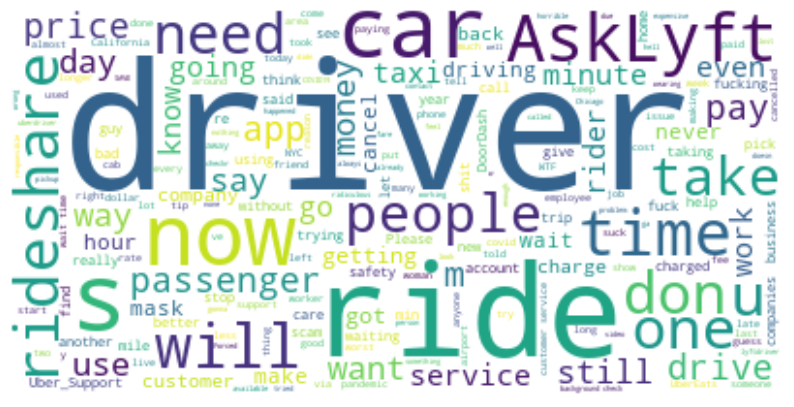

In [113]:
text = "".join(tweet for tweet in Lyft_Neg.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co','amp',])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Words to look into for Lyft Negative data: 

* driver 
* AskLyft
* price 
* ride 
* mask 
* passenger

In [180]:
Lyft_Neg.loc[Lyft_Neg['Text'].str.contains('driver',case=False)].head(100)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
18,20,2021-07-27 20:13:11+00:00,1420115067480289289,$100+ fares and 2-hour wait times: What the #Uber and #Lyft driver shortage means for you https://t.co/bWDVADzG9k,LimoGame,en,negative
104,109,2021-07-27 07:23:33+00:00,1419921382448656387,They're Stealing from Everybody: A Rant on Uber/Lyft Price Fixing https://t.co/nVeBF1VgHM via @YouTube #Uber #Lyft @DriversSf,mkhobson,en,negative
482,504,2021-07-23 22:27:23+00:00,1418699288981516288,A Rash of Carjackings Has #Uber and #Lyft Drivers in #Illinois and Across the Country Worried About Their Safety https://t.co/7uaqsQM6hn,KatzFriedman,en,negative
524,546,2021-07-23 16:15:40+00:00,1418605744950169605,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,negative
623,648,2021-07-23 00:27:44+00:00,1418367188218650626,So @uber @ubersupport and @dkhos are retaliating against me for exposing that they charge drivers to give trips and it’s pretty hilarious #uber #rideshare #lyft https://t.co/g92FPW8Dwf,TheSofaaa,en,negative
700,726,2021-07-22 13:11:20+00:00,1418196967193300996,Working for an #Algorithm - #Uber And #Lyft Drivers Are Being #Carjacked at Alarming Rates in the #US. The Markup confirmed 124 carjackings and attempted carjackings of drivers across the country. Drivers say companies are doing little to help #journalism\n https://t.co/KsBKxReTTz,medianut,en,negative
707,734,2021-07-22 12:14:52+00:00,1418182758979956737,#GigEconomy #Uber and #Lyft drivers join day-long #strike over working conditions https://t.co/f1ehHlipVV,intaucom,en,negative
719,747,2021-07-22 09:45:00+00:00,1418145040984121344,"#Uber and #Lyft drivers strike for a day, say earnings are declining despite driver shortage \n\nhttps://t.co/NW5frjaNO8",Cognisant2000,en,negative
723,751,2021-07-22 09:12:46+00:00,1418136931758534657,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,negative
753,782,2021-07-22 02:24:13+00:00,1418034114666668038,#Uber and #Lyft Drivers are on strike for 24 hours. #ridesharing #drivers #StrikeUberLyft \n\nhttps://t.co/Gc6zk0Acnh,MsTaraVon,en,negative


* Mostly talking about how drivers are not being compensated enough for rides 
* Both companies being called out for not being able to find enough drivers -- seems to be due to low wages again. 

In [149]:
Lyft_Neg.loc[Lyft_Neg['Text'].str.contains('AskLyft',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
347,363,2021-07-25 06:52:20+00:00,1419188751855652864,@Uber_Support Tagging all #uber accounts hoping someone know what the Hell they're doing. @UberEng @UberDevelopers @Uber_India @UberEats \n\nhey @AskLyft see chain above - any chance you guys top this very very low bar set by @Uber_Support ?,JZthewrapper,en,negative
524,546,2021-07-23 16:15:40+00:00,1418605744950169605,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,negative
723,751,2021-07-22 09:12:46+00:00,1418136931758534657,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,negative
930,963,2021-07-20 15:27:49+00:00,1417506539254861828,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,negative
2266,2339,2021-07-08 17:17:11+00:00,1413185407877926917,@Uber #uber PUH-LEEEEZ ASK ME TO DO A FOR SURVEY!!! PLEASE! 😡😭 #LATEforFlights 😡 #LATEforDrAppt 😠 #LATEforMeetings 😫\n#PRICEbaiting 🤥\n#BaitAndSwitch 😳\n@lyft @AskLyft to pick me up!!,IamLAJones,en,negative
2947,3198,2021-07-02 11:56:06+00:00,1410930278189649921,"Be careful accepting rides from this driver, Samuel F Okonkwo. He is abusive and a unsafe driver. #nyc #Brooklyn #lyft #uber @311 @Uber_Support @AskLyft @lyft https://t.co/kDeS6fsxrx",thinkpnk,en,negative
4408,4726,2021-06-20 17:27:17+00:00,1406664968095768576,@AskLyft @lyft what a horrible company you’ve turned out to be. I feel you ripped me off. I feel you are a dishonest company. My family will be switching to Uber #uber #Rideshare #rides #lyft I’ll be #boycotting.,N348803,en,negative
4870,5211,2021-06-16 23:25:58+00:00,1405305679909371910,"@AskLyft I just had an awful ride from a ""premium"" driver who didn't want to wear her mask, drove erratically and had the music turned up loud. Called support and they missed most of the issues in their summary email reply to me. I guess it's back to #Uber for me now.",BSbikeNJ,en,negative
5328,5689,2021-06-13 03:33:36+00:00,1403918451211636736,"Was already thinking about making Uber my go to bc Lyft has zero promotions for existing users but this is beyond absurd. Step it up, @lyft @AskLyft or I promise you I won't be the only customer switching over to the dark side #uber #UFC263 #lyft #Rideshare https://t.co/9zAq3Lhzd0",iStayWinning365,en,negative
6187,7038,2021-06-05 22:23:46+00:00,1401303760043974658,@AskLyft It’s a joke because your drivers suck.. #Uber,Owen_Nad,en,negative


Seems like lyft doesn't have as many issues with support not responding but customers are not pleased with the responses that support has given them. Drivers raise concern that they are always directed to a chat bot support when they just want to talk to a human. People want more Lyft drivers around 

In [156]:
Lyft_Neg.loc[Lyft_Neg['Text'].str.contains('price',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
104,109,2021-07-27 07:23:33+00:00,1419921382448656387,They're Stealing from Everybody: A Rant on Uber/Lyft Price Fixing https://t.co/nVeBF1VgHM via @YouTube #Uber #Lyft @DriversSf,mkhobson,en,negative
1223,1260,2021-07-17 21:41:42+00:00,1416513467389972480,Why are Uber and Lyft getting away with an over 80% price increase?? Normal $5 fares are now costing $40-60 in Boston this week. @MassAGO @MassGovernor @MayorKimJaney #uber #lyft #Massachusetts @Uber @lyft,Ma20Bos,en,negative
1263,1301,2021-07-17 14:30:23+00:00,1416404921562316801,These ride-service apps are f****** ridiculous. How does the price jump in three minutes?? WTF happens in three minutes that the prices jump $5 - $15+? #lyft #uber #nyc #wtf,Smartchyle,en,negative
1406,1448,2021-07-16 11:37:26+00:00,1415999009450123264,@lyft and @Uber prices in New York are getting absolutely ridiculous. Yellow taxi or train it is from now on. #uber #lyft https://t.co/NoWFYtwAIg,philippe_BBY,en,negative
1427,1470,2021-07-16 06:19:55+00:00,1415919105027153921,"Stories are mostly fiction and numbers are always facts. Here are a few simple facts:\n1)If #Uber was priced at #ZomatoIPO price/sales (trailingFY) at the time of IPO, investors would have lost over 70% of their principal by now\n2)Ditto if #Lyft IPO was priced similarly. 70% down",_HarryVish,en,negative
2057,2123,2021-07-10 16:03:00+00:00,1413891513730232320,ICYMI: Why have #Uber and #Lyft prices dramatically increased?\n\nhttps://t.co/CRwE58M5df,KCBSAMFMTraffic,en,negative
2262,2335,2021-07-08 18:02:00+00:00,1413196685048647680,Why have #Uber and #Lyft prices dramatically increased?\n\nhttps://t.co/CRwE58M5df,KCBSAMFMTraffic,en,negative
2266,2339,2021-07-08 17:17:11+00:00,1413185407877926917,@Uber #uber PUH-LEEEEZ ASK ME TO DO A FOR SURVEY!!! PLEASE! 😡😭 #LATEforFlights 😡 #LATEforDrAppt 😠 #LATEforMeetings 😫\n#PRICEbaiting 🤥\n#BaitAndSwitch 😳\n@lyft @AskLyft to pick me up!!,IamLAJones,en,negative
2322,2396,2021-07-08 10:27:30+00:00,1413082305879490567,SF residents choosing #taxis over @uber and ⁦@lyft⁩ because of a lack of drivers and high prices \n\n#sf #uber #lyft #commuting #travel https://t.co/MoQTHq7UWE,paul__mangione,en,negative
2330,2404,2021-07-08 07:30:12+00:00,1413037689964679170,"""We just can’t stop talking about how high the prices are getting. It’s ridiculous.""\n\nFULL ARTICLE at https://t.co/dLoFVZaHa3\n\n#uber #lyft #pricesurge #sanfran #sanfrancisco #taxi #taxidrivers #taa #internationalnews #taxis #ubernews https://t.co/iTgmF0PBCH",Transport_AA,en,negative


* concern over how quickly a price can multiply 
* pricing is not competitive enough to choose uber/ lyft over a taxi service 
* prices have skyrocketed  -- seems to be a global issues (not only Lyft) 

In [175]:
Lyft_Neg.loc[Lyft_Neg['Text'].str.contains('ride',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
479,501,2021-07-23 23:06:50+00:00,1418709219172225024,"Why #kids daycare centers SUCK so bad: So today I picked up a ride from @KinderCare, she went to the pot vape shop. Then had me drop her off at the corner by her work so she could vape one the way back inside. #daycare #fails! #Lyft #uber",GourmetReviewer,en,negative
623,648,2021-07-23 00:27:44+00:00,1418367188218650626,So @uber @ubersupport and @dkhos are retaliating against me for exposing that they charge drivers to give trips and it’s pretty hilarious #uber #rideshare #lyft https://t.co/g92FPW8Dwf,TheSofaaa,en,negative
643,669,2021-07-22 20:58:34+00:00,1418314549392986115,I got a ride no problem on Wednesday. These #strikes are nonsense and only media grabbers. #uber #lyft #rideshare https://t.co/46CIvYHhYU,CBizMoney,en,negative
753,782,2021-07-22 02:24:13+00:00,1418034114666668038,#Uber and #Lyft Drivers are on strike for 24 hours. #ridesharing #drivers #StrikeUberLyft \n\nhttps://t.co/Gc6zk0Acnh,MsTaraVon,en,negative
766,796,2021-07-21 23:06:57+00:00,1417984472645967872,@JermarkusFuller #Uber and #Lyft are always busy but drivers are not taking any rides. I always do a shift night and I get very good money..\nBut what I don't like is that @lyft takes too long to put the challenges during the week,ElogInolvidable,en,negative
770,800,2021-07-21 22:01:05+00:00,1417967896874012676,"@Uber Is that how your drivers treat your passengers? This Uber Driver was rude to his passenger, canceled his Uber ride request, and then Boasted about it on Social Media. smh.. #uber #uberdriver #Lyft #lyftdriver https://t.co/wHVq7lnVkg",KicksTings,en,negative
825,856,2021-07-21 14:50:29+00:00,1417859529371488257,"#Uber and #Lyft Face Nearly 1,000 #Sexual #Assault Claims Against Their #TNC #Rideshsre #Drivers! https://t.co/uAc4EWKeLH",LoneStarSUVLimo,en,negative
986,1020,2021-07-20 05:41:25+00:00,1417358966913372160,"When Uber &amp; Lyft are taking close to 50% of each riders payments, you know there’s a massive problem with the #rideshare industry. It’s time for some serious regulations! What happened to them taking only 25% ? Psssh. #Uber #Lyft #Drivers \n\nhttps://t.co/Kn0ZsL94kp",MsTaraVon,en,negative
1065,1099,2021-07-19 14:17:38+00:00,1417126490286825474,@Uber WHY THE FUCK ARE YOU SURGING REGULARLY IN THE 5 BOROUGHS OF NYC❓❓❓TIME TO DOWNLOAD @LYFT ‼️ #UBER HAS GOTTEN GREEDY‼️MY RIDE PASS IS EVEN WORTHLESS NOW🖕🏾,AndoliniRolanda,en,negative
1116,1151,2021-07-19 03:09:24+00:00,1416958320955514881,"@jimiuorio kind of like #uber #lyft rider or driver ratings that set up losing propositions for all. I once mistyped misinfo during covid, retracted it, apologized to all parties I sent it to, resent more accurate info, as much as was known then! I L8r reported 1 guy for slandering me",TrevorSmithCTA,en,negative


* Looks like Lyft does ride bonuses but they don't do a good job of posting them until it's too late to partake in the associated challenge

* Not much new information in these tweets, uber and lyft are both mentioned in most so they have already appeared earlier when searching through Uber tweets 

In [176]:
Lyft_Neg.loc[Lyft_Neg['Text'].str.contains('mask',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
60,62,2021-07-27 14:54:30+00:00,1420034869623676932,"@Uber you can kiss my ass goodbye. I wore that damn #facemask the entire time I was in that car - I didn't want to, but I did. I've been the #Uber and #UberEats girl since the beginning, but no more. We're done. #Lyft and #GrubHub In with y'all now. https://t.co/5ccIzH1lwO",KaraStockton,en,negative
1731,1785,2021-07-13 16:00:08+00:00,1414977956938756097,Rideshare drivers and passengers are alleging discrimination related to the mask policies Uber and Lyft have in place. Click here to learn more: https://t.co/PZKlOWPNbL\n\n#RideshareNews #Uber #Lyft #RideshareLawGroup #RideshareDiscrimination #NationwideRideshareLawyers,Rideshare_Law,en,negative
1809,1864,2021-07-13 04:05:33+00:00,1414798125580103687,"""Black and LGBTQ passengers told BuzzFeed News they’re being refused rides due to false claims they’re not wearing masks. But masked drivers are also being accused."" #Uber #Lyft #discrimination https://t.co/HHmdZrAEzD",afr0rican,en,negative
1990,2052,2021-07-11 15:16:47+00:00,1414242271789264896,"#fatpeople dont be rude, plz request XL or your rating will tank. I dont cancel ppl bc no havin mask on, but if you r fat with no mask i will. #fuckyou #uber #lyft!",ElCorreCamin0s,en,negative
2589,2757,2021-07-06 05:57:09+00:00,1412289494179618817,My Uber driver just reported me for not wearing a mask even though I 100% WAS! I don't appreciate the false accusation and I'm definitely regretting that tip and 5 star rating I gave them. Guess I'm switching to Lyft. #Uber #Masks #NotHappy,BroOOokieCrisp,en,negative
3161,3426,2021-06-30 20:49:06+00:00,1410339634379382791,"#ICYMI! No, I'm not bitter, why do you ask? https://t.co/QV2c4KSBSc #HUMOR #COMICS #FUNNY 🖕🏾 #uber &amp; ALL #racistandincompetentpoliceofficers! 👍🏾 #Lyft #JuliusPeppers #LeBronJames #backgroundcheck #WearAMask #BlackLivesMatter #CartoonistsWhoResist",CompanyManComic,en,negative
3210,3475,2021-06-30 16:33:21+00:00,1410275272377651200,"#TheNooner! No, I'm not bitter, why do you ask? https://t.co/QV2c4KSBSc #HUMOR #COMICS #FUNNY 🖕🏾 #uber &amp; ALL #racistandincompetentpoliceofficers! 👍🏾 #Lyft #JuliusPeppers #LeBronJames #backgroundcheck #WearAMask #BlackLivesMatter #CartoonistsWhoResist",CompanyManComic,en,negative
3237,3502,2021-06-30 13:24:24+00:00,1410227720605233153,"NEW! No, I'm not bitter, why do you ask? https://t.co/QV2c4KB0tC #HUMOR #COMICS #FUNNY 🖕🏾 #uber &amp; ALL #racistandincompetentpoliceofficers! 👍🏾 #Lyft #JuliusPeppers #LeBronJames #backgroundcheck #WearAMask #BlackLivesMatter #CartoonistsWhoResist",CompanyManComic,en,negative
4711,5047,2021-06-18 03:00:32+00:00,1405722067530567681,Lifting the mask mandate is fucking with #Lyft &amp; #Uber drivers because both still require masks now half of people are coming to you without a mask and wanting to sit in the front seat which is again still off limits with both companies. 😡 https://t.co/cDro9Q7v1A,gargoyleslave,en,negative
4870,5211,2021-06-16 23:25:58+00:00,1405305679909371910,"@AskLyft I just had an awful ride from a ""premium"" driver who didn't want to wear her mask, drove erratically and had the music turned up loud. Called support and they missed most of the issues in their summary email reply to me. I guess it's back to #Uber for me now.",BSbikeNJ,en,negative


* False claims of passengers not wearing masks -- they believe they are being discriminated against 
* basically just seems like people are upset over users not wearing masks -- also some about drivers not wearing masks. 


In [177]:
Lyft_Neg.loc[Lyft_Neg['Text'].str.contains('passenger',case=False)].head(50)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
770,800,2021-07-21 22:01:05+00:00,1417967896874012676,"@Uber Is that how your drivers treat your passengers? This Uber Driver was rude to his passenger, canceled his Uber ride request, and then Boasted about it on Social Media. smh.. #uber #uberdriver #Lyft #lyftdriver https://t.co/wHVq7lnVkg",KicksTings,en,negative
1709,1763,2021-07-13 19:35:12+00:00,1415032080279482372,A #Pandemic #SafetyFeature On #Uber And #Lyft Is Getting #Abused To #Scam #Drivers And #Discriminate Against #Passengers.,Susan_Larson_TN,en,negative
1714,1768,2021-07-13 18:34:08+00:00,1415016712244711427,A Pandemic Safety Feature On #Uber And #Lyft Is Getting Abused To Scam Drivers And Discriminate Against Passengers https://t.co/v9hw1ZLa66 via @juliareinstein,zafarwestern,en,negative
1725,1779,2021-07-13 16:29:46+00:00,1414985411953414154,"This totally happened to me the other day and I couldn’t figure out why, I thought he wanted a bigger tip! #uber A Pandemic Safety Feature On Uber And Lyft Is Getting Abused To Scam Drivers And Discriminate Against Passengers https://t.co/jj74yWs9Jn via @juliareinstein",charlies_who,en,negative
1731,1785,2021-07-13 16:00:08+00:00,1414977956938756097,Rideshare drivers and passengers are alleging discrimination related to the mask policies Uber and Lyft have in place. Click here to learn more: https://t.co/PZKlOWPNbL\n\n#RideshareNews #Uber #Lyft #RideshareLawGroup #RideshareDiscrimination #NationwideRideshareLawyers,Rideshare_Law,en,negative
1767,1822,2021-07-13 08:47:00+00:00,1414868955072630785,A Pandemic Safety Feature On Uber And Lyft Is Getting Abused To Scam Drivers And Discriminate Against Passengers #SmartNews ⁦@Uber⁩ ⁦@lyft⁩ #discrimination ? #uber #lyft https://t.co/7TeCrjEu7u,alabeacub,en,negative
1809,1864,2021-07-13 04:05:33+00:00,1414798125580103687,"""Black and LGBTQ passengers told BuzzFeed News they’re being refused rides due to false claims they’re not wearing masks. But masked drivers are also being accused."" #Uber #Lyft #discrimination https://t.co/HHmdZrAEzD",afr0rican,en,negative
2348,2422,2021-07-08 04:16:53+00:00,1412989037967597570,Taxis are a thing again for passengers frustrated by high surge pricing of Uber and Lyft. Driver shortages and less venture capital funding to subsidize prices have made ride-sharing services less appealing https://t.co/CYcuWgvPTE @amyhollyfield #uber #lyft #taxi #sanfrancisco,albertfong98,en,negative
3136,3398,2021-07-01 01:53:09+00:00,1410416152627531776,"Hey @dkhos and @nicksilver I may put this video on PornHub, it’s of Uber fucking a Chicago driver in 28 seconds. Do passenger prices reflect the surge disappearing just as quickly? Should be a fun one to look into. #uber #rideshare #lyft https://t.co/zgJAOYFYiq",TheSofaaa,en,negative
3755,4055,2021-06-26 01:13:09+00:00,1408594145208320002,@lyft will let a passenger report lies about a driver to avoid their cancellation fee. They’re putting #drivers at #COVID19 risk through bad policy. Take an #Uber instead. #lyft #lyftsucks,Dan_In_Indy,en,negative


These are mostly tweets that have appeared in other sections

In [154]:
Lyft.loc[Lyft['Text'].str.contains('help',case=False)].head(100)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
36,38,2021-07-27 16:57:38+00:00,1420065858559221760,"When selecting a vehicle for driving rideshare, the three most important items to consider are gas mileage, reliability, and price. We can help you about this!\n\nFor more information hit at &gt; https://t.co/woCFNFRoWn\n\n#makemoneydriving #Uber #Lyft #Chicago #UberEats #ChicagoRentals https://t.co/JhsYnhgjgN",PINNICOCARS,en,neutral
152,159,2021-07-26 19:45:42+00:00,1419745763303718912,"Less drivers, bc “… they found other jobs,"" Cee said. ""The pandemic helped us realize we were hooked, trapped in an abusive relationship with Uber.""\n\n#PROAct #Lyft #Uber\nUber Driver Independence A Bumpy Road | Barron's https://t.co/bvyn7Rht50",DailyLyft,en,neutral
636,661,2021-07-22 21:05:32+00:00,1418316302695862273,If you use #Uber and #Lyft you are helping to exploit and abuse workers. It really is that simple. https://t.co/d5FfaYlLSX,BruceMirken,en,negative
700,726,2021-07-22 13:11:20+00:00,1418196967193300996,Working for an #Algorithm - #Uber And #Lyft Drivers Are Being #Carjacked at Alarming Rates in the #US. The Markup confirmed 124 carjackings and attempted carjackings of drivers across the country. Drivers say companies are doing little to help #journalism\n https://t.co/KsBKxReTTz,medianut,en,negative
799,830,2021-07-21 17:58:40+00:00,1417906890755870728,Our main goal is to help drivers get out on the road and make money as quickly as possible. Choose a car to start driving and making money.\n\nFor more information hit at &gt; https://t.co/woCFNFRoWn\n\n#ChicagoCarRental #Chicago #Uber #Lyft #ChicagoRentals #Doordash #UberEats #Caviar https://t.co/n1nktdR22T,PINNICOCARS,en,positive
1259,1297,2021-07-17 14:51:51+00:00,1416410322349535239,4 Ways to Make Money From St. Patrick's Day \n#babysitting #crafts #extraincome #fastcash #helping #Holidays #lyft #ridesharing #selling #sidegigs #St.PatricksDay #Uber #doge #coin #finance #xvs #financenews #coinbase #elonmusk\nhttps://t.co/3BdMv70wEg,financetrade365,en,neutral
1321,1362,2021-07-17 00:00:39+00:00,1416186044186308614,Looking to pay off debt or want extra cash to spend? Becoming an Uber or Lyft driver can be helpful. But here's what that means for your auto policy. https://t.co/EAyLp6ucuW\n\n#Uber #Lyft #Rideshare #DrivingJobs #GigEconomy #UberDriver https://t.co/0svSELk6xL,AISinsurance,en,positive
1612,1662,2021-07-14 16:47:43+00:00,1415352317076021249,"Do you rely on your vehicle for income? Ride share, meal deliveries, service vehicles, or fleets... no matter your occupation we understand how important your vehicle is to your livelihood.\nLet us help keep you and your clients or cargo safely on the road. \n#Uber #Lyft #RideShare https://t.co/TTRsaJnZSm",LakesAreaAuto,en,positive
1614,1664,2021-07-14 16:44:21+00:00,1415351472192163847,"Do you rely on your vehicle for income? Ride share, meal deliveries, service vehicles, or fleets... no matter your occupation we understand how important your vehicle is to your livelihood.\nLet us help keep you and your precious cargo safely on the road. \n#Uber #Lyft #RideShare https://t.co/WC6NqlyjM8",ChaseAutomotive,en,positive
2281,2354,2021-07-08 15:53:06+00:00,1413164245118685186,"How do you contact @lyft #lyft for immediate help? I don't have their app and their driver didn't show! Such poor customer service! They say all over the site contact us for help, but don't really mean it. Stick with @uber #uber. #Rideshare",conklinva01,en,negative


In [155]:
Uber.loc[Uber['Text'].str.contains('help',case=False)].head(100)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment
19,21,2021-07-27 20:04:33+00:00,1420112897737375749,"Like I said, #goodbyeUber! @Uber’s standards are terrible, and their customer service response does nothing to help their passengers. Deleted! No future ride-shares will happen with this company. @Uber_Support #Uber https://t.co/V6Mi96yVsQ https://t.co/wsI95JyM3B",4katiemack,en,negative
36,38,2021-07-27 16:57:38+00:00,1420065858559221760,"When selecting a vehicle for driving rideshare, the three most important items to consider are gas mileage, reliability, and price. We can help you about this!\n\nFor more information hit at &gt; https://t.co/woCFNFRoWn\n\n#makemoneydriving #Uber #Lyft #Chicago #UberEats #ChicagoRentals https://t.co/JhsYnhgjgN",PINNICOCARS,en,neutral
53,55,2021-07-27 15:47:46+00:00,1420048274812293122,Interesting new #Ubereats FAIL @Uber @Ubereats I received notification directly after accepting offer (I know this Marriott well). But the problem is: Custo NOT in Marriott. Why try to help by making us look silly &amp;&amp; #Uber still needs to show EXACT ADDRESS ONCE AND FOR ALL #uber https://t.co/yYGBPvHN7F,DlvryDryvr,en,negative
95,100,2021-07-27 09:49:31+00:00,1419958119476641795,#Cairo #Uber dishonest doesnt give you your refund their remove the app doesnt help you in a serious situation they disconnect you\ndo not use #Uber in #Cairo taxi will match Uber fare...\ndish9nnest service,airnation,en,negative
96,101,2021-07-27 09:44:38+00:00,1419956888322588688,@Uber_Support No help. #uber https://t.co/sJ5YgcvBRO,AlhanoofSR,en,neutral
152,159,2021-07-26 19:45:42+00:00,1419745763303718912,"Less drivers, bc “… they found other jobs,"" Cee said. ""The pandemic helped us realize we were hooked, trapped in an abusive relationship with Uber.""\n\n#PROAct #Lyft #Uber\nUber Driver Independence A Bumpy Road | Barron's https://t.co/bvyn7Rht50",DailyLyft,en,neutral
155,162,2021-07-26 19:04:39+00:00,1419735432854712321,@uber @Uber_Support I have a dashcam and I do Uber rides...a customer is disputing the ride and I am NOT able to cash out!! I need help #ihateurservice #ubermymoney #uber #uberprolems,ihateurservice_,en,negative
296,308,2021-07-25 17:38:04+00:00,1419351257307774976,"I booked a cab on 20th July, 2021 from Uber and paid the driver cash. The app still shows that the ride fare is unpaid. No amount of uber support has helped all these days #Uber Please help resolve this!",sayalipawar8,en,negative
297,309,2021-07-25 17:24:13+00:00,1419347773183250432,Dear @Uber_Support @Uber_India \n\nOne of my close friend left his phone in cab. Could you please help to get it back. Phone is with your driver. \n\nThanks\n#uber #ubersupport #needhelp,GeekNarayan,en,neutral
313,325,2021-07-25 15:28:06+00:00,1419318547986083845,Thank you Uber for your continuous support and helping us with our food drives through free rides! 🥰💚 \nOur ride from Rawatpur to Central Station ❤️\n\n#MoveWhatMatters #Uber #RHA #RobinHoodArmy \n@rha_india \n@Uber_India https://t.co/T6eLltagO0,GyanviSharma_,en,positive


### Things I have noticed need to be worked on from this notebook: 

* Implement a system where the driver needs to check the car before and after a ride to ensure proper charging for damages 

* Implement a behavioral course that drivers need to complete prior to starting their position with Uber -- to avoid issues with drivers being rude/etc -- should only be like an hour long course max 

* Need to shift support team to have someone in charge of dealing with social media support requests -- seems like customers seem very unheard 

* Every tweet about scheduled Uber rides is complaining about having the ride cancelled and being charged or having no follow up regarding the ride being cancelled -- maybe an incentive for drivers to follow through on scheduled drives or a bigger punshiment for cancelling a scheduled ride after already accepting it?

* Articles talking about how Uber has decreased drunk driving rates by 6.1% -- feel like this could be publicized more. 

* Both companies were originally striving to be different from yellow taxis and it seems like now they have strayed from the possibility of that, they need to prioritize customer support/service and then consider looking into the more expensive issues at hand 

* Firing drivers based on inappropriate tweets found online??? Directly tagging Uber and Lyft 

### Things I had written down to work on in the "VADER Labeling" notebook:

* Drivers canceling due to refusal of accepting credit cards 
* Scheduled services canceling on day of scheduled ride (This is a very common complaint) 
* Drivers demanding cash only payments 
* Drivers canceling due to drop locations 
* Extra charges being requested for rides 
* Not being refunded for cancelled rides 
* Allowing drivers that are 15 minutes away completing another drive to accept the ride and then charging to cancel and book with another driver that is closer 
* Not compensating riders enough for errors made by drivers 
* Cancellation done by driver -- rider is charged cancellation fee.
* Complaints about pay being too low 
* issues with drivers taking alternative routes than what is suggested but also complaints about suggested routes being inefficient -- could be better if there was a standard 
* Charging more for rides but drivers aren't seeing an increase in wages 
* General consensus is that Uber Support does not answer or effectively solve issues at hand. Customers are feeling unheard and upset. 
* Having issues with drivers not wearing mask 
* Drivers faking damage reports (Maybe they should implement a time frame from the previous drive that they can submit a report? Force drivers to examine car before accepting another ride otherwise how can you be sure it was from that ride? Enforce a training on how to report this so that it can be done efficiently. Encourage drivers to submit pictures of vehicle prior to starting a ride/work day -- pictures do not need to be examined by an employee unless a complaint/incident is submitted -- pictures to be stored on drivers phone to avoid data storage issues for company -- encourage drivers to also examine a vehicle prior to entering in case there is obvious damage that was caused prior to them entering -- this would also encourage drivers to choose the safest drop off location) 